# **PROYECTO** **FINAL**

## `GRUPO 3` ⛑ 
1.   Leo Oropin
2.   Christian Morales
3.   José David Morales


## CASO

Se necesita cumplir con determinado rendimiento y calidad de la energía. Primero para no recurrir en posibles multas o gastos terceros por incumplir los requerimientos. Segundo, para asegurar que el Centro Técnico reciba energía de calidad. Se cuenta con un respaldo de energía que puede entrar en funcionamiento a discreción.

Se tienen medidores de calidad de energía en la acometida, que se está monitoreando cada 15 minutos. El fin es determinar si conviene pasar al respaldo de energía y dejar de consumir de la energía comercial. Para cumplir con los requerimientos.



In [1]:
# Carga de librerias
import pandas as pd   ## principal módulo para la manipulación y análisis de datos (DataFrames)
import numpy as np   ## módulo de manipulación de matrices y vectores, cálculos numericos
import matplotlib.pyplot as plt ## principal módulo para gráficas
import seaborn as sns   ## otro módulo de gráficas

import plotly.express as px
import plotly.graph_objects as go


# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N ⚡

## DATASET

> Total: 36,559

> > Train: 21,932 

> > Eval: 7,314

> > Test: 7,314

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de dataset desde carpeta compartida en Google Drive

In [3]:
frj1n_train = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TRAIN.xlsx")
frj1n_eval = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_EVAL.xlsx")
frj1n_test = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TEST.xlsx")

In [4]:
columnsDF= ['date','voltage_ab','voltage_bc', 'voltage_ca', 'voltage_avg', 'voltage_unbalance', 'current_a', 'current_b', 'current_c', 'current_avg','true_power', 'reactive_power', 'apparent_power', 'frequency','commute']
frj1n_train.columns = columnsDF
frj1n_eval.columns = columnsDF
frj1n_test.columns = columnsDF

*Dimensiones del set de datos FRJ TRAIN*

In [5]:
filycol1 = frj1n_train.shape
filycol1

(21934, 15)

*Dimensiones del set de datos FRJ EVAL*

In [6]:
filycol2 = frj1n_eval.shape
filycol2

(7312, 15)

*Dimensiones del set de datos FRJ TEST*

In [7]:
filycol3 = frj1n_test.shape
filycol3

(7312, 15)

## Proceso Generador de Datos (del Dataset)



> En la acometida principal de los Centros Tecnicos se tiene instalado un medidor de calidad de energia, para el registro de la alimentacion de energia, voltaje en media tension, corriente y potencia consumida.  Asi como otra serie de variables mas especificas de calidad de energia.  Para este caso, se considera un medidor Schneider Electric modelo ION8650B el cual se encuentra instalado en la celda de media tension de CT Fraijanes.

> La extraccion de la informacion del medidor se realiza de forma manual utilizando el software ION Setup v3.1.  Los datos registrados se almacenan en un archivo de excel desde el 17-04-2022 a la 1:00:00 horas.  El dataset contiene mediciones de las variables de energia en periodos de 15 minutos, hasta la fecha promedio de las 3 lineas (sistema trifasico)

> Los datos son del tipo estructurados, y la lectura de cada registro es el promedio registrado en el periodo de 15 minutos de la frecuencia de la medicion.  El medidor de calidad de energia tiene la capacidad de obtener mediciones mas precisas y de otras variables, sin embargo, para nuestra area por el momento unicamente se registra la medicion de las variables de distribucion y no de QoE (quality of energy). 




**Feature**           | **Description**
--------------------|------------------------------------------------- 
Date                |   Fecha y hora de la medicion  
voltage_ab          |   Voltaje linea a linea entre fases a y b
voltage_bc          |   Voltaje linea a linea entre fases b y c
voltage_ca          |   Voltaje linea a linea entre fases c y a
voltage_avg         |   Voltaje promedio de las 3 lineas 
voltage_unbalance   |   Voltaje de desbalance
current_a           |   Corriente linea a
current_b           |   Corriente linea b
current_c           |   Corriente linea c
current_avg         |   Corriente promedio de las 3 lineas
true_power          |   Potencia Activa total
reactive_power      |   Potencia Reactiva total
apparent_power      |   Potencia Aparente total
frequency           |   Frecuencia
commute             |   Conmutación de enegía comercial a planta de emergencia (***variable respuesta)***

*Información de la estructura generaldel dataset*

In [8]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21934 non-null  datetime64[ns]
 1   voltage_ab         21934 non-null  float64       
 2   voltage_bc         21934 non-null  float64       
 3   voltage_ca         21934 non-null  float64       
 4   voltage_avg        21934 non-null  float64       
 5   voltage_unbalance  21934 non-null  float64       
 6   current_a          21934 non-null  float64       
 7   current_b          21934 non-null  float64       
 8   current_c          21934 non-null  float64       
 9   current_avg        21934 non-null  float64       
 10  true_power         21934 non-null  float64       
 11  reactive_power     21934 non-null  float64       
 12  apparent_power     21934 non-null  float64       
 13  frequency          21934 non-null  object        
 14  commut

*Convertimos la variable frequency en FLOAT (originalmente tipo object)*

In [9]:
frj1n_train["frequency"] = pd.to_numeric(frj1n_train["frequency"], errors = 'coerce')
frj1n_eval["frequency"] = pd.to_numeric(frj1n_eval["frequency"], errors = 'coerce')
frj1n_test["frequency"] = pd.to_numeric(frj1n_test["frequency"], errors = 'coerce')

In [10]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21934 non-null  datetime64[ns]
 1   voltage_ab         21934 non-null  float64       
 2   voltage_bc         21934 non-null  float64       
 3   voltage_ca         21934 non-null  float64       
 4   voltage_avg        21934 non-null  float64       
 5   voltage_unbalance  21934 non-null  float64       
 6   current_a          21934 non-null  float64       
 7   current_b          21934 non-null  float64       
 8   current_c          21934 non-null  float64       
 9   current_avg        21934 non-null  float64       
 10  true_power         21934 non-null  float64       
 11  reactive_power     21934 non-null  float64       
 12  apparent_power     21934 non-null  float64       
 13  frequency          21869 non-null  float64       
 14  commut

*Estadistica descriptiva Dataset FRJ_TRAIN*



In [11]:
frj1n_train.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute
count,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21869.000000,21934.000000
mean,13478.407918,13565.181056,13507.990803,13517.193308,0.449150,31.908782,28.725652,28.208035,29.614156,682.422514,121.606897,693.925476,60.001063,0.009209
std,748.303831,750.145990,746.148508,748.011597,0.389954,4.868469,4.441785,4.327800,4.544402,102.285839,40.850764,105.776069,0.007379,0.095525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.075649,0.000000,59.878582,0.000000
25%,13381.613500,13467.936750,13419.276250,13423.909438,0.352654,32.156620,29.077117,28.351676,29.869161,700.520386,134.653236,713.717834,59.996948,0.000000
50%,13518.754000,13605.872500,13547.094875,13557.070285,0.409755,33.245283,30.051410,29.413403,30.905147,714.659729,140.129554,728.403290,60.000534,0.000000
75%,13687.074500,13773.215500,13709.916250,13723.547000,0.479797,34.111739,30.771646,30.229497,31.701270,725.280304,143.960571,739.402725,60.004444,0.000000
max,14753.377000,14798.309570,14727.437500,14759.702000,9.643581,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,60.060234,1.000000


# Analisis Exploratorio 🔎

## Graficos de Dispersion de las features

*Aplicamos solo sobre el DATASET DE TRAINING ÚNICAMENTE*

### Voltajes y Corrientes

<Axes: xlabel='date', ylabel='voltage_ca'>

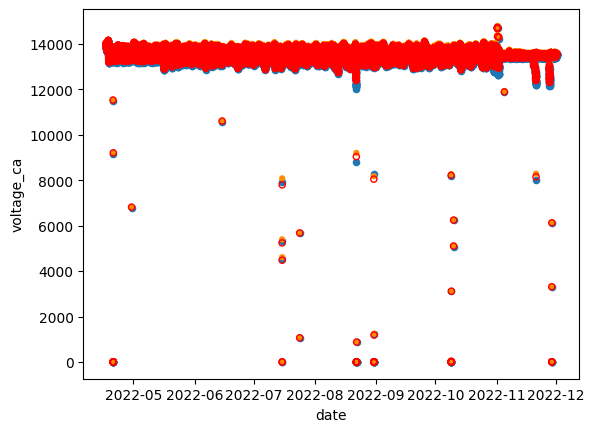

In [12]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_ab', ax=ax)
frj1n_train.plot.scatter('date','voltage_bc', c='darkorange', edgecolor='none', ax=ax)
frj1n_train.plot.scatter('date','voltage_ca', c='none', edgecolor='red', ax=ax)

*Diagrama de dispersión del **Voltaje Promedio** de las tres fases*

<Axes: xlabel='date', ylabel='voltage_avg'>

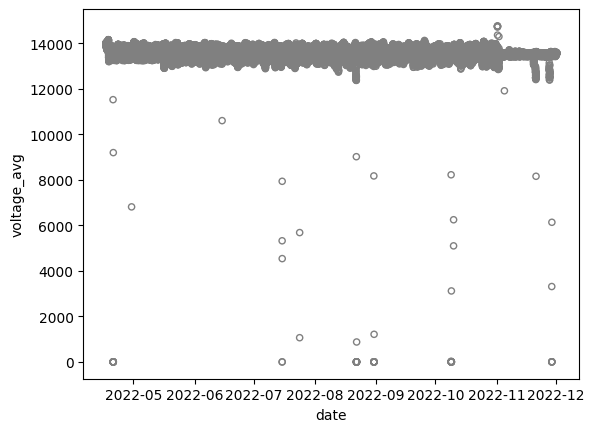

In [13]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_avg', c='none', edgecolor='gray', ax=ax)

Observación: se puede apreciar que los voltajes son todos muy similares y que por lo tanto, el voltaje promedio (voltaje_avg) representará muy bien a las 3 features de voltajes por fase.

*Diagrama de dispersión de la **Corriente** de cada una de las fases*

> *Se observa un leve desbalance en la carga para la Fase A (azul)*



<Axes: xlabel='date', ylabel='current_c'>

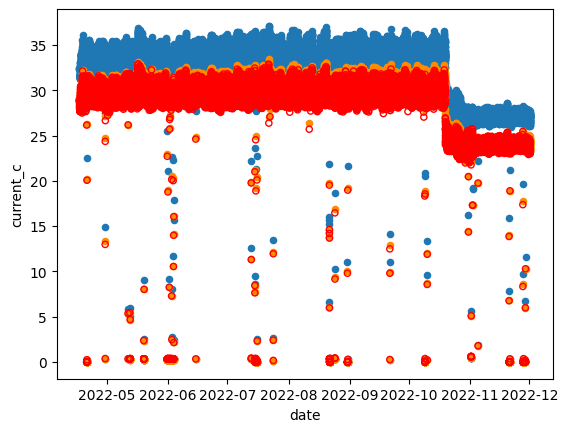

In [14]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','current_a', ax=ax)
frj1n_train.plot.scatter('date','current_b', c='darkorange', ax=ax)
frj1n_train.plot.scatter('date','current_c', c='none', edgecolor='red', ax=ax)

*Comportamiento de la corriente de carga promedio en el tiempo, esta feature también es capaz de representar bien a las tres features de corriente por fase*

<Axes: xlabel='date', ylabel='current_avg'>

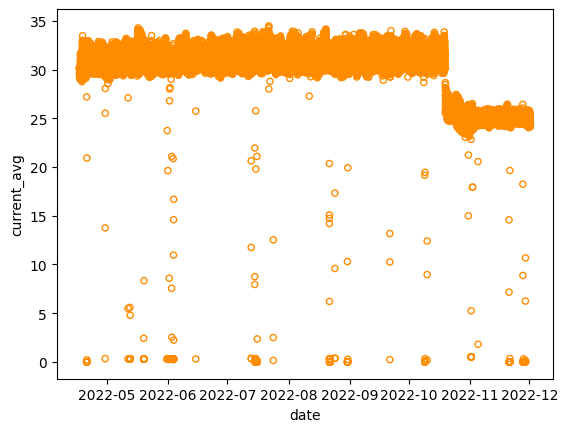

In [15]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','current_avg',c='none', edgecolor='darkorange', ax=ax)

### Triangulo de potencias (kW, kVA, kVAR)

* kW = potencia activa
* kVA = potencia aparente
* kVAR = potencia reactiva


<Axes: xlabel='date', ylabel='true_power'>

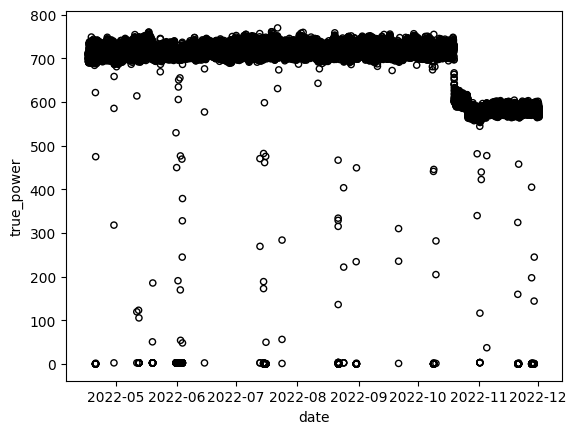

In [16]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','true_power',c='none', edgecolor='black', ax=ax)

<Axes: xlabel='date', ylabel='reactive_power'>

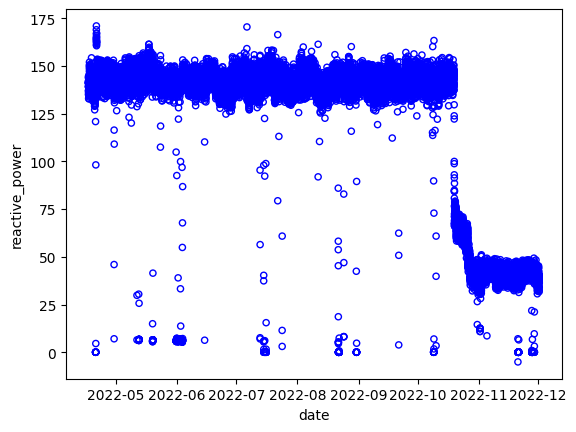

In [17]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','reactive_power',c='none', edgecolor='blue', ax=ax)

<Axes: xlabel='date', ylabel='apparent_power'>

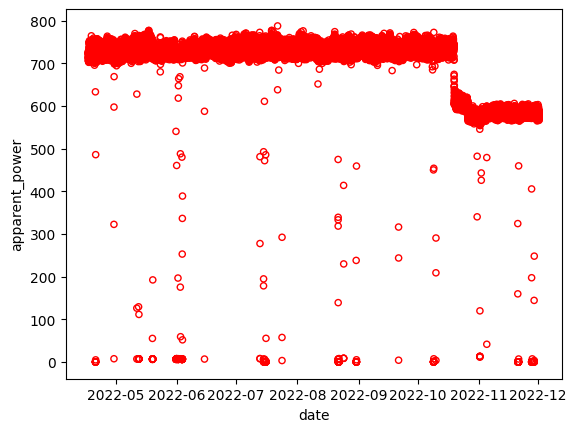

In [18]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','apparent_power',c='none', edgecolor='red', ax=ax)

Observaciones: a diferencia de la potencia activa y aparente, la reactiva si muestra el mismo comportamiento pero se encuentra en una escala menor.

### Frecuencia

<Axes: xlabel='date', ylabel='frequency'>

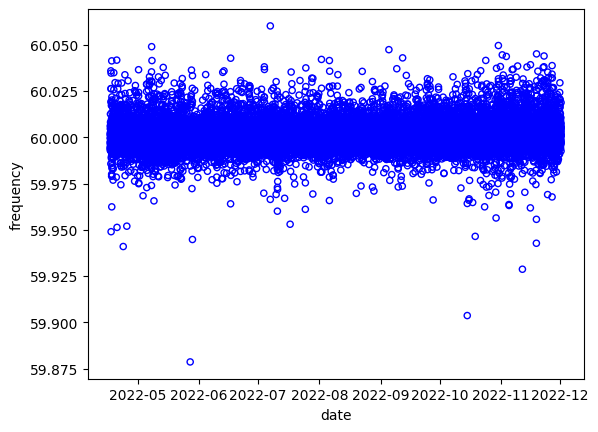

In [19]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','frequency',c='none', edgecolor='blue', ax=ax)

Observaciones: esta feature prácticamente no muestra ninguna diferencia a lo largo del tiempo, sin embargo existen valores atípicos. 

### *Voltaje de Desbalance (voltage_unbalance)*

<Axes: xlabel='date', ylabel='voltage_unbalance'>

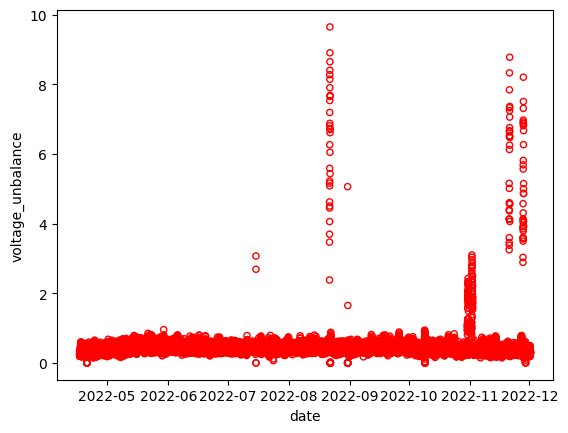

In [20]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_unbalance',c='none', edgecolor='red', ax=ax)

### Variable respuesta: Commute

<Axes: xlabel='commute', ylabel='count'>

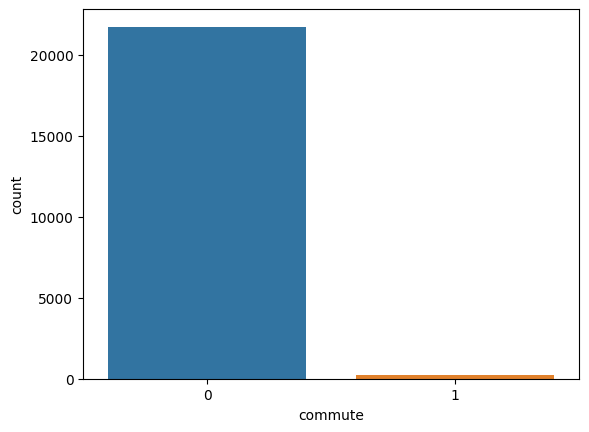

In [21]:
fig, ax = plt.subplots()
sns.countplot(data=frj1n_train,x='commute', ax=ax)

Obervaciones: se cuenta con un dataset completamente desbalanceado para la variable respuesta (commute), que indica las veces que se vuelve necesario realizar una conmutación de energía

## Variables predictoras 

Estas son las variables que consideramos tienen mayor incidencia en la variable respuesta, para las cuales aplicamos cuatro tipos de graficos

1.   Cajas
2.   Histograma
3.   Violin
4.   Densidad

Y las variables son:

*   voltage_avg
*   current_avg
*   frequency
*   true_power

### *Voltaje Promedio Linea a Linea (voltage_avg)*

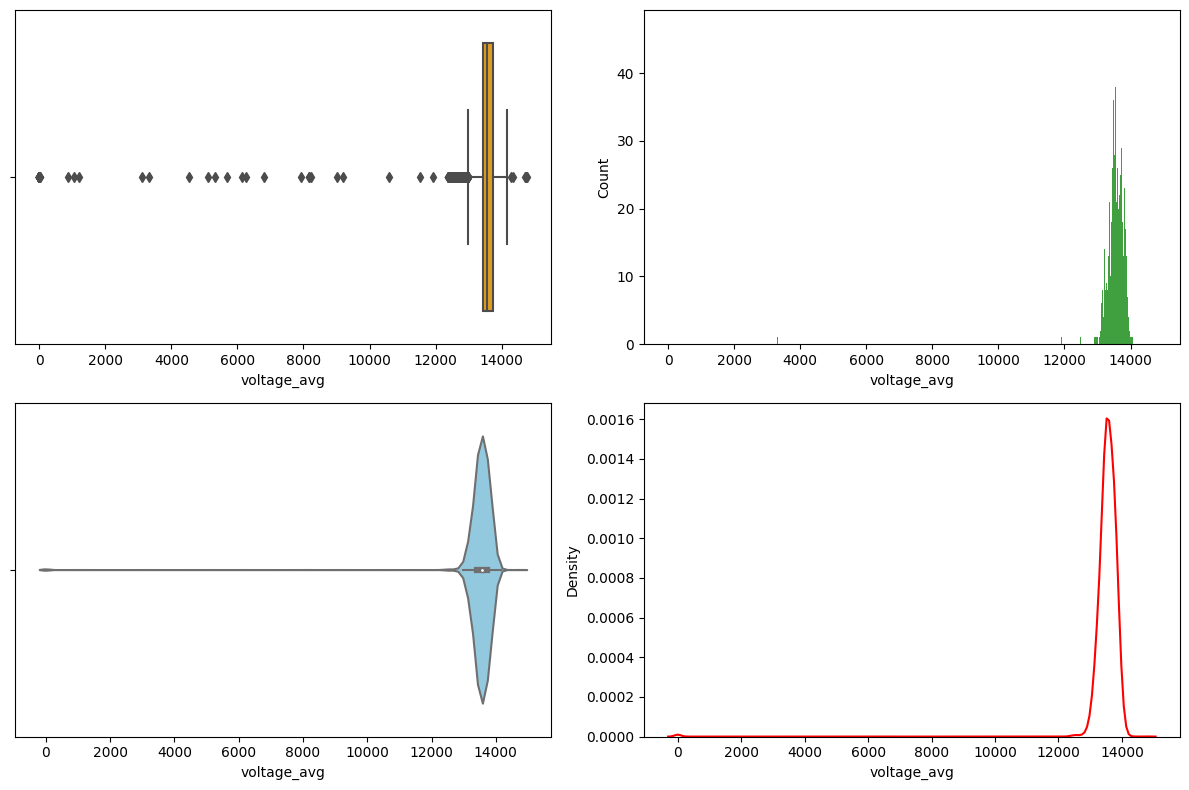

In [22]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='voltage_avg', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='voltage_avg', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='voltage_avg', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='voltage_avg', color="red", ax=axs[1,1])
plt.tight_layout()

### *Corriente Promedio Trifasica (current_avg)*

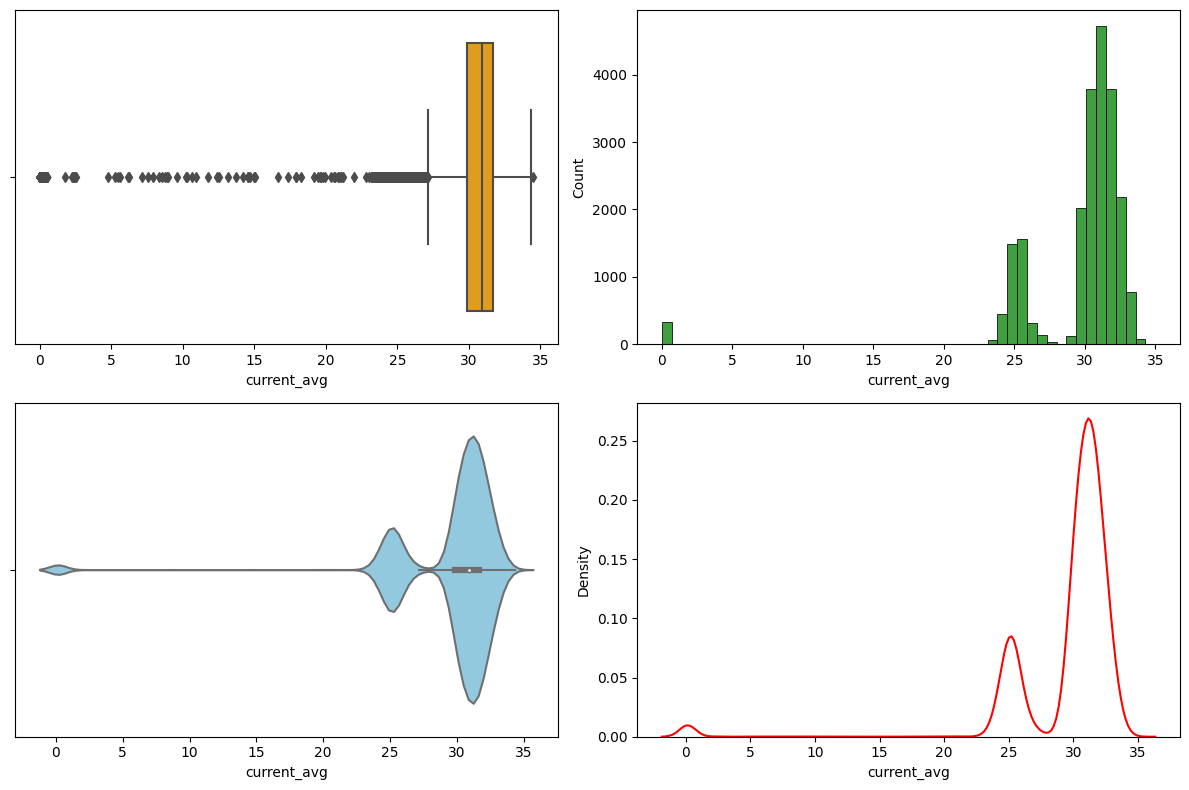

In [23]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='current_avg', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='current_avg', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='current_avg', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='current_avg', color="red", ax=axs[1,1])
plt.tight_layout()

### *Frecuencia (para Guatemala 60Hz)*

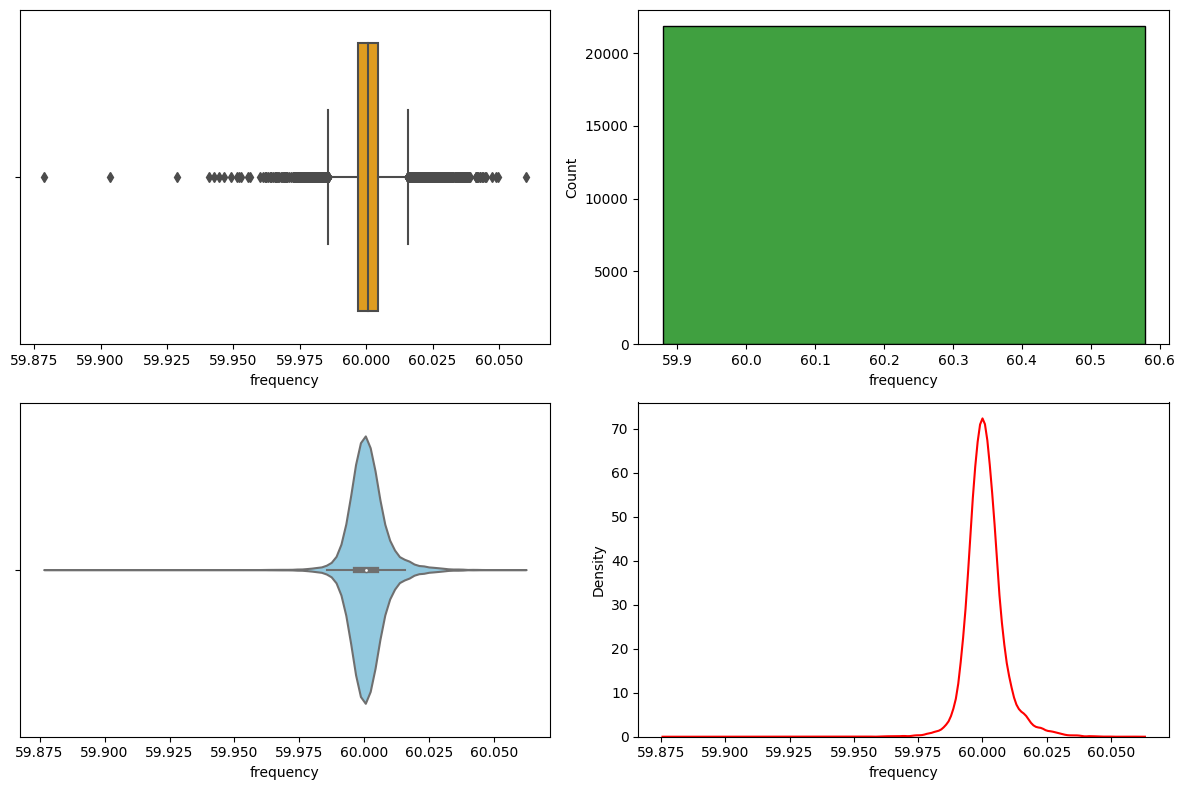

In [24]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='frequency', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='frequency', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='frequency', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='frequency', color="red", ax=axs[1,1])
plt.tight_layout()

### *Potencia Activa Promedio (true_power)*

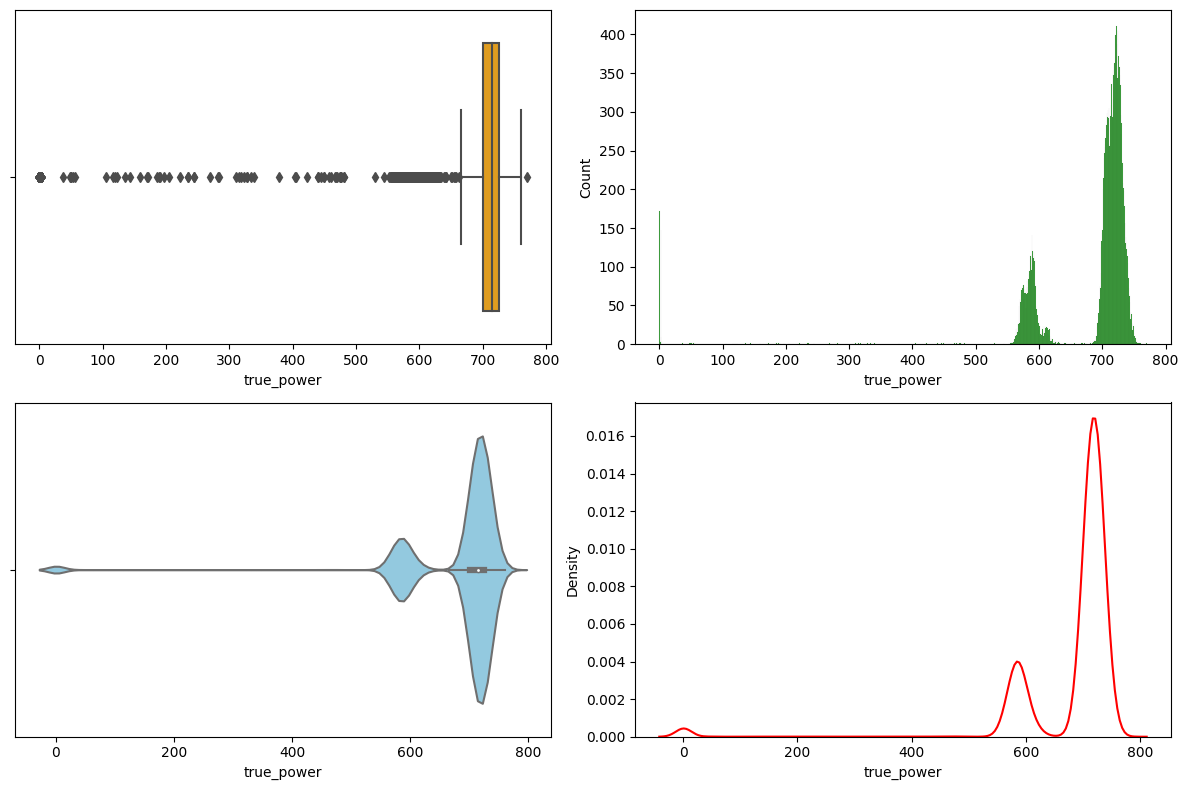

In [25]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='true_power', orient='h', color="orange", ax=axs[0,0]) #los outliers refieren a cortes de energia
sns.histplot(data=frj1n_train,x='true_power', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='true_power', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='true_power', color="red", ax=axs[1,1])
plt.tight_layout()

Observaciones: de los conjuntos de gráficos anteriores, se observa una districión principalmente normal (aunque sesgada).

En el caso de la corriente y de la potencia, se tiene una distribución bi-modal. Esto se debe a una disminución en la carga del Centro Técnico. Sin embargo en ambos casos, continúa centrada respecto a la media de su moda.

## Comparación de features

### *Potencia Activa Promedio vs Voltaje linea-linea Promedio*

<Axes: xlabel='true_power', ylabel='voltage_avg'>

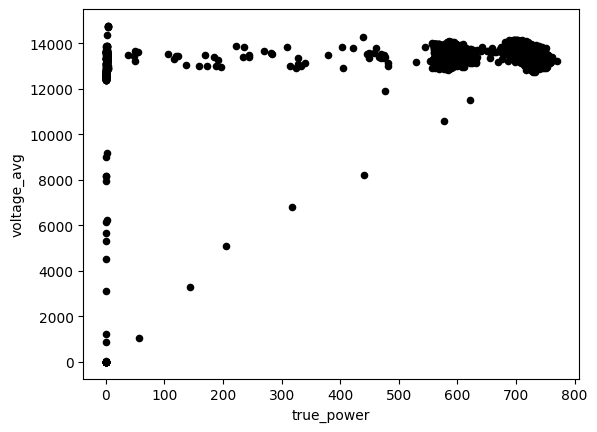

In [26]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('true_power','voltage_avg', color="black",ax=ax)

### *Voltaje linea-linea promedio vs Corriente promedio*

<Axes: xlabel='current_avg', ylabel='voltage_avg'>

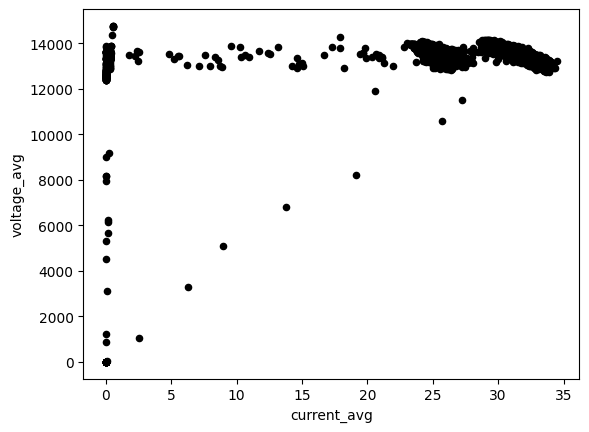

In [27]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('current_avg','voltage_avg', color="black",ax=ax)

Observaciones: de los gráficos de dispersión anteriores, se puede suponer que la variable voltage_avg no tiene relación directa con la potencia activa ni la corriente promedio

### *Potencia activa promedio vs corriente promedio - correlacionado*


<Axes: xlabel='true_power', ylabel='current_avg'>

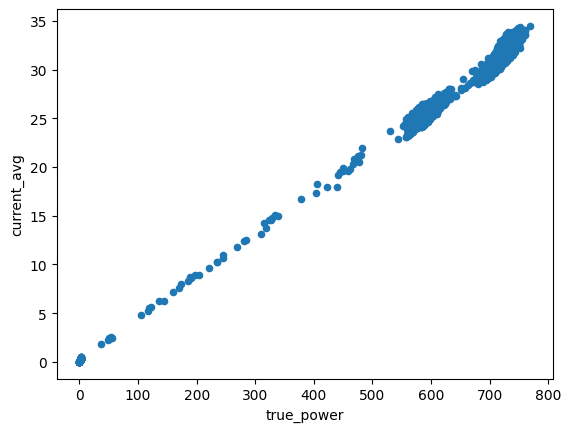

In [28]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('true_power','current_avg', ax=ax)

Observaciones: se tiene una relación directamente proporcional (y=x) entre las features de TRUE_POWER y CURRENT_AVG. Lo cuál es esperado debido a la fórmula de w = i*v. Debido a esto, se puede llegar a pensar en descartar la variable true_power, sin embargo no se hará para validar si con alguna transformación nos puede mostrar influencia sobre la variable respuesta.

## Resumen  de la densidad de las features numericas

*Para elaborar el siguiente grafico de densidad eliminaron las 2 variables que no son numericas*

In [29]:
df = pd.DataFrame(data=frj1n_train)
del df['date']
del df['commute']

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

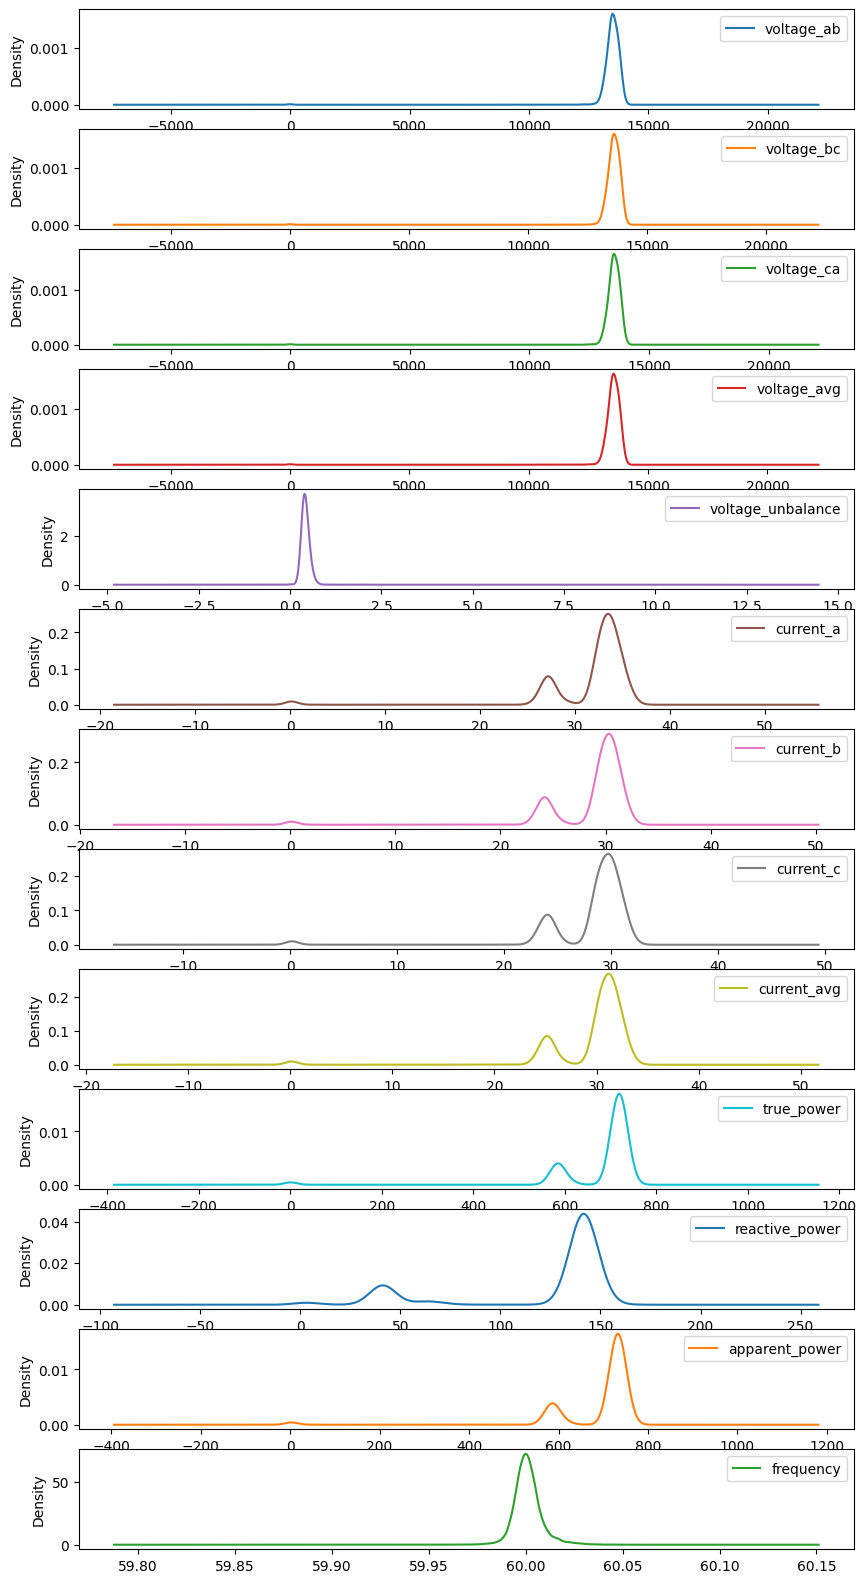

In [30]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

Observaciones: los Aires Acondicionados representan un aporte significativo en la demanda de potencia reactiva, ya que fueron los que se sacaron hacia el plan de contingencia

## Relación de las features predictoras versus la variable respuesta

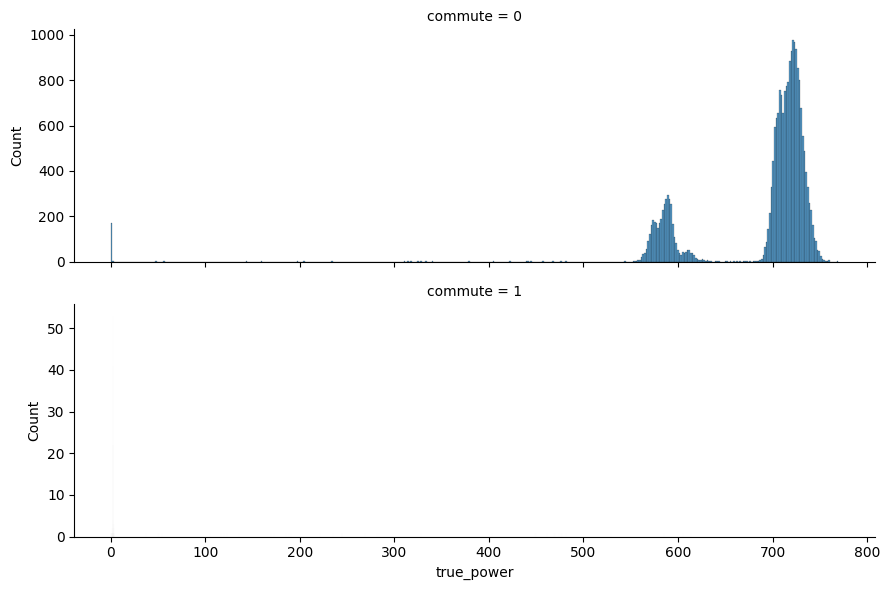

In [31]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='true_power')#, log_scale=True, binwidth=0.03)

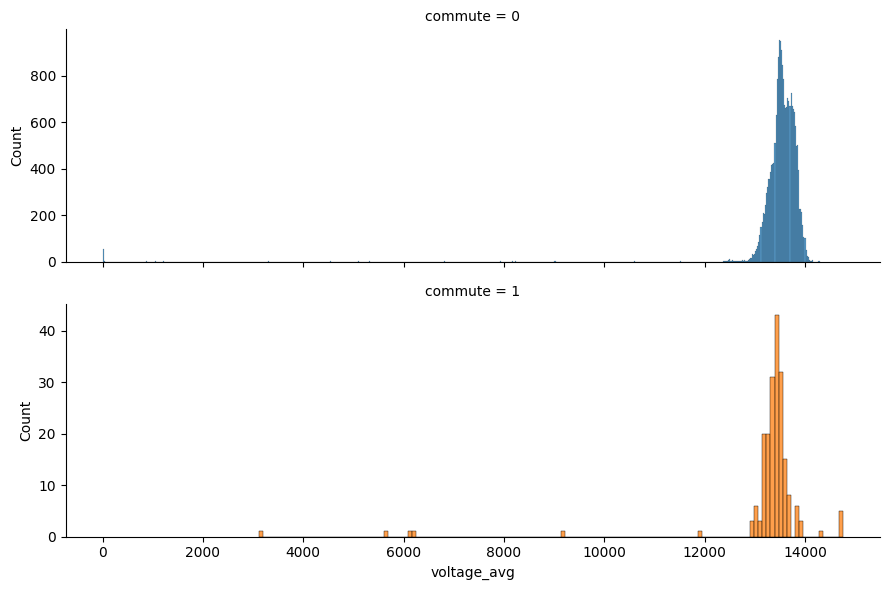

In [32]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='voltage_avg')#, log_scale=True, binwidth=0.03)

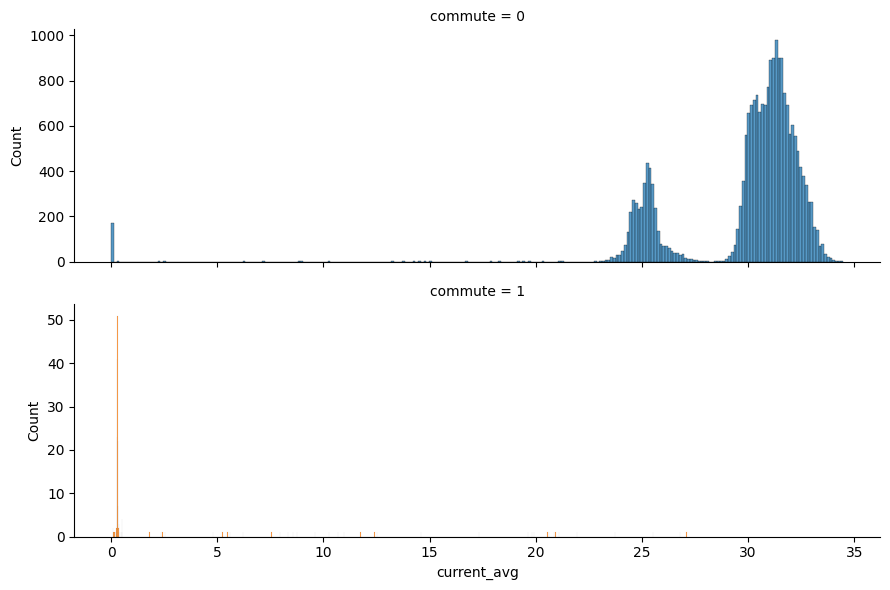

In [33]:

g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='current_avg')#, log_scale=True, binwidth=0.03)

Nota: tanto la potencia activa (true_power) cómo la corriente promedio (current_avg), no se muestran muy presentes cuándo la variable respuesta (commute) es 1. Esto debido a que estas dos variables prácticamente se vuelven 0 cuando conmuta la energía, ya que dejamos de consumir energía comercial

### Consideración de variable: Reactive Power

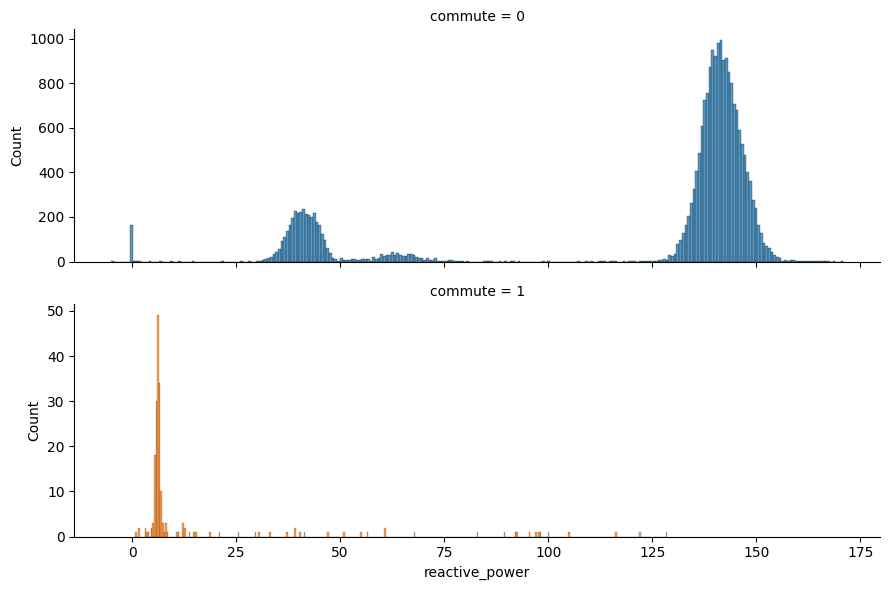

In [34]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='reactive_power')#, log_scale=True, binwidth=0.03)

In [35]:
# variable 'true_power' por día
hora = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).median()

Distribucion Bimodal, lo que se explica por la disminucion de la carga por la implementacion de la contingencia en la subestacion.

<Axes: xlabel='true_power', ylabel='Count'>

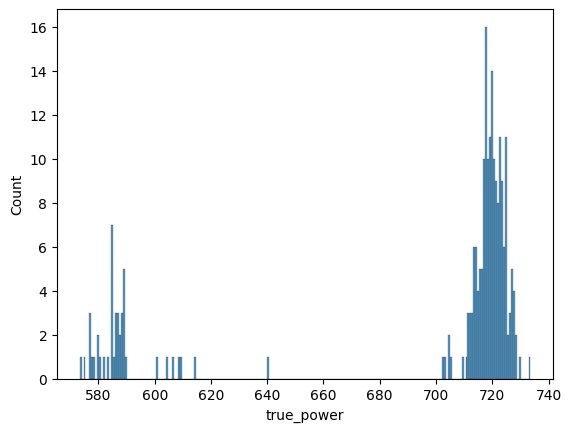

In [36]:
#Grafico Histograma
sns.histplot(data=hora,x='true_power', binwidth=0.7)

## Analisis Actual del Set de Datos (Referencia)

> Dejamos la refencia de lo que actualmente en nuestra area se trabaja con el dataset, ya que con las herramientas adquiridas en el curso se esta ampliando el alcande de uso.



Datos agrupados por dia; se toma el valor maximo de cada día para discriminar los cortes de energia durante periodos cortos

In [37]:
frj = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).max()

Visualizacion del comportamiento de la potencia en el tiempo.

<Axes: xlabel='date'>

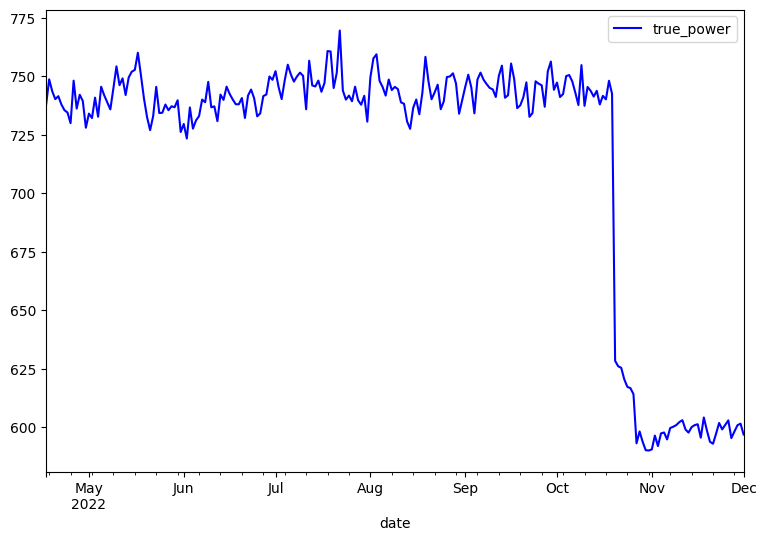

In [38]:
frj.plot.line(y="true_power",
                color = "blue",
                figsize =(9,6))

# Creacion de nuevas Features ⚒

## Features Categoricas 

### Voltaje Promedio Clasificado

Creacion de variables categoricas de los voltajes

Según el manual de operación del Centro Técnico, el voltaje se categoriza de la siguiente manera:

*   Si es menor a 95% del voltaje nominal, se considera Voltaje Bajo
*   Si es mayor a 105% del voltaje nominal, se considera Voltaje Alto
*   Si se encuentra dentro de ese rango, se considera Voltaje Normal de Operación

> *El voltaje nominal de la red electrica de la EEGSA para el suministro de energia en media tension es de 13,600 V*




In [39]:
vnominal = 13600 

frj1n_train['vclasif_ab'] = frj1n_train.voltage_ab.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_bc'] = frj1n_train.voltage_bc.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_ca'] = frj1n_train.voltage_ca.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_avg'] = frj1n_train.voltage_avg.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))

In [40]:
frj1n_train['vclasif_ab'].value_counts()

Normal    21658
Bajo        270
Alto          6
Name: vclasif_ab, dtype: int64

In [41]:
frj1n_train['vclasif_bc'].value_counts()

Normal    21778
Bajo        149
Alto          7
Name: vclasif_bc, dtype: int64

In [42]:
frj1n_train['vclasif_ca'].value_counts()

Normal    21750
Bajo        177
Alto          7
Name: vclasif_ca, dtype: int64

In [43]:
frj1n_train['vclasif_avg'].value_counts()

Normal    21738
Bajo        189
Alto          7
Name: vclasif_avg, dtype: int64

In [44]:
sns.set_theme(style="darkgrid")

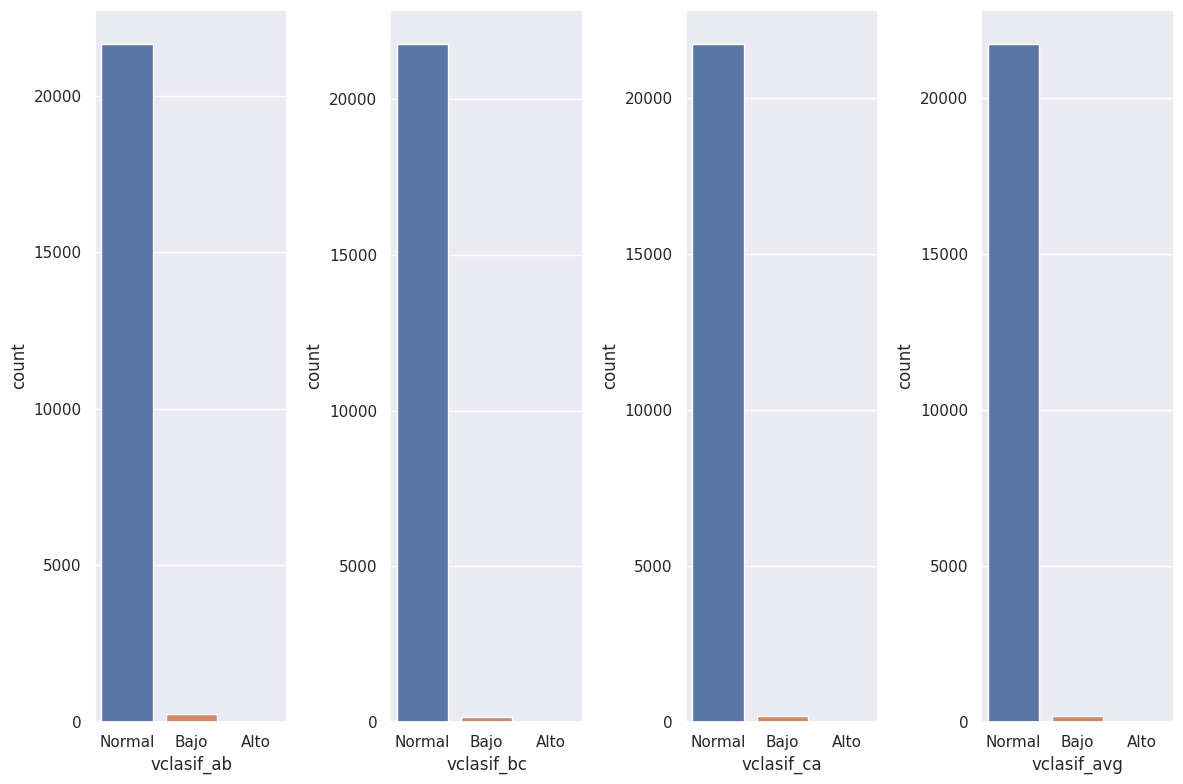

In [45]:
fig, axs = plt.subplots(1,4, figsize=(12,8)) #create grid
sns.countplot(data=frj1n_train,x='vclasif_ab', ax=axs[0])
sns.countplot(data=frj1n_train,x='vclasif_bc', ax=axs[1])
sns.countplot(data=frj1n_train,x='vclasif_ca', ax=axs[2])
sns.countplot(data=frj1n_train,x='vclasif_avg', ax=axs[3])
plt.tight_layout()

Observación: se tomará en cuenta únicamente el Voltaje Promedio dado que representa bien a los voltajes de las tres fases

### Alarma de Potencia Reactiva

Creacion de nueva feature categorica para visualizar advertencia por potencia reactiva de 150 kVAR (seguridad en la operacion por accionamiento de protecciones)

In [46]:
frj1n_train['kvar_warn']=frj1n_train.reactive_power.map(lambda x: 'Warning' if x>150 else 'Ok')

In [47]:
frj1n_train['kvar_warn'].value_counts()

Ok         21184
Warning      750
Name: kvar_warn, dtype: int64

<Axes: xlabel='kvar_warn', ylabel='count'>

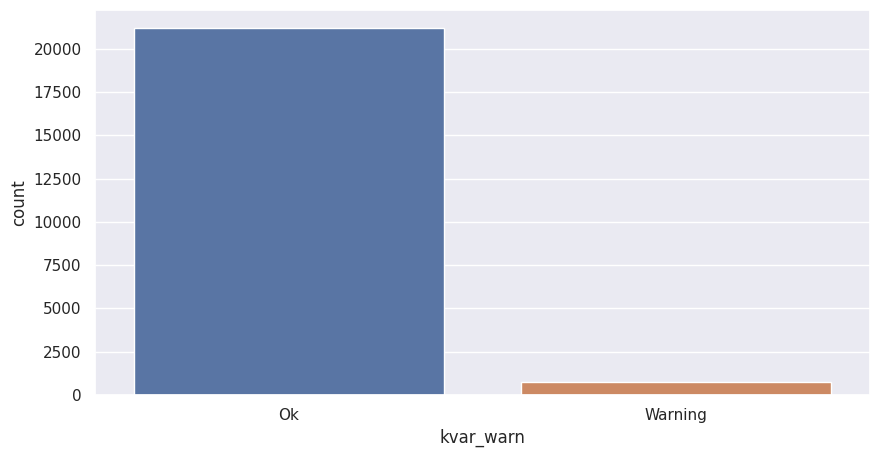

In [48]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='kvar_warn')

### Frecuencia Error

De acuerdo al REGLAMENTO DEL MERCADO ELÉCTRICO REGIONAL -RMER- en los citerios de operacion del SISTEMA ELECTRICO 

REGIONAL - SER- en el inciso 16.2.5 Criterios y Parámetros de Calidad indica para la frecuencia de la red:

* 16.2.5   Criterios y Parámetros de Calidad
* 16.2.5.5 La frecuencia nominal del SER es 60 Hz.
* 16.2.5.6 Durante la operación normal, el 90% de las variaciones de la frecuencia promedio en períodos de 10 minutos, deberán estar comprendidas dentro del rango de (60 ± 1.65 σ) Hz, donde σ es la desviación estándar de la frecuencia promedio en períodos de 10 minutos. El valor de σ será de 0.03 Hz.

> Creacion de nueva feature indicando riesgo de operacion por frecuencia fuera de parametros de operacion: 60hz+/- 1.65 * (0.03) hz. sigma = 0.03 hz   [59.5, 60.5]

In [49]:
frj1n_train["frequency"] = pd.to_numeric(frj1n_train["frequency"], errors = 'coerce')

frj1n_train['frequency_error']=frj1n_train.frequency.map(lambda x: 'QoE_Ok' if 60.05>x>59.95 else 'QoE_Out') #QoE = Quality of Energy

In [50]:
frj1n_train['frequency_error'].value_counts()

QoE_Ok     21860
QoE_Out       74
Name: frequency_error, dtype: int64

<Axes: xlabel='frequency_error', ylabel='count'>

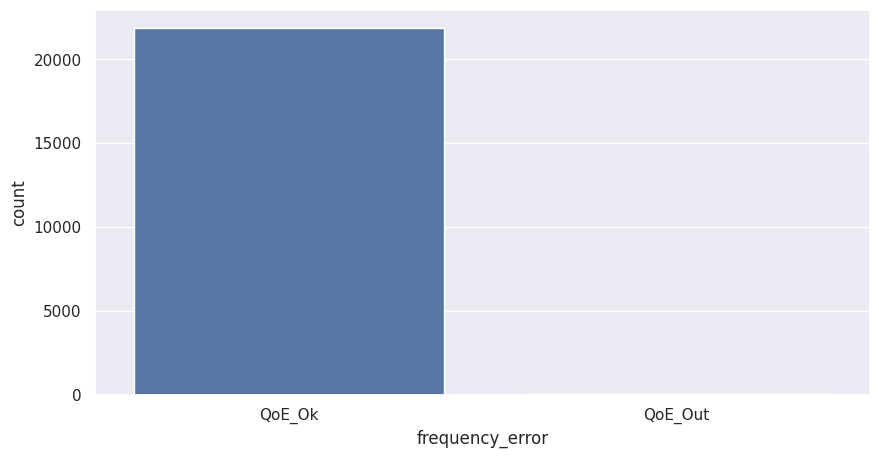

In [51]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='frequency_error')

# Limpieza de Outliers 📤

Dichos datos atipicos se pueden eliminar para efectos de analisis, por conocimiento del negocio se toma dicha decision. Se toma en cuenta los datos dentro del 10% al 99%


In [52]:
frj1n_train['voltage_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    13259.419400
0.50    13557.070285
0.90    13835.928900
0.95    13888.560250
0.99    13990.810460
Name: voltage_avg, dtype: float64

In [53]:
a = frj1n_train['voltage_avg']>frj1n_train['voltage_avg'].quantile(0.1)
a

0        True
1        True
2        True
3        True
4        True
         ... 
21929    True
21930    True
21931    True
21932    True
21933    True
Name: voltage_avg, Length: 21934, dtype: bool

In [54]:
frj1n_10 = frj1n_train[frj1n_train['voltage_avg']>frj1n_train['voltage_avg'].quantile(0.1)].copy()
frj1n_99 = frj1n_10[frj1n_10['voltage_avg']<frj1n_10['voltage_avg'].quantile(0.99)].copy()

Graficos Histograma para evaluar distribucion antes y despues de la limpieza

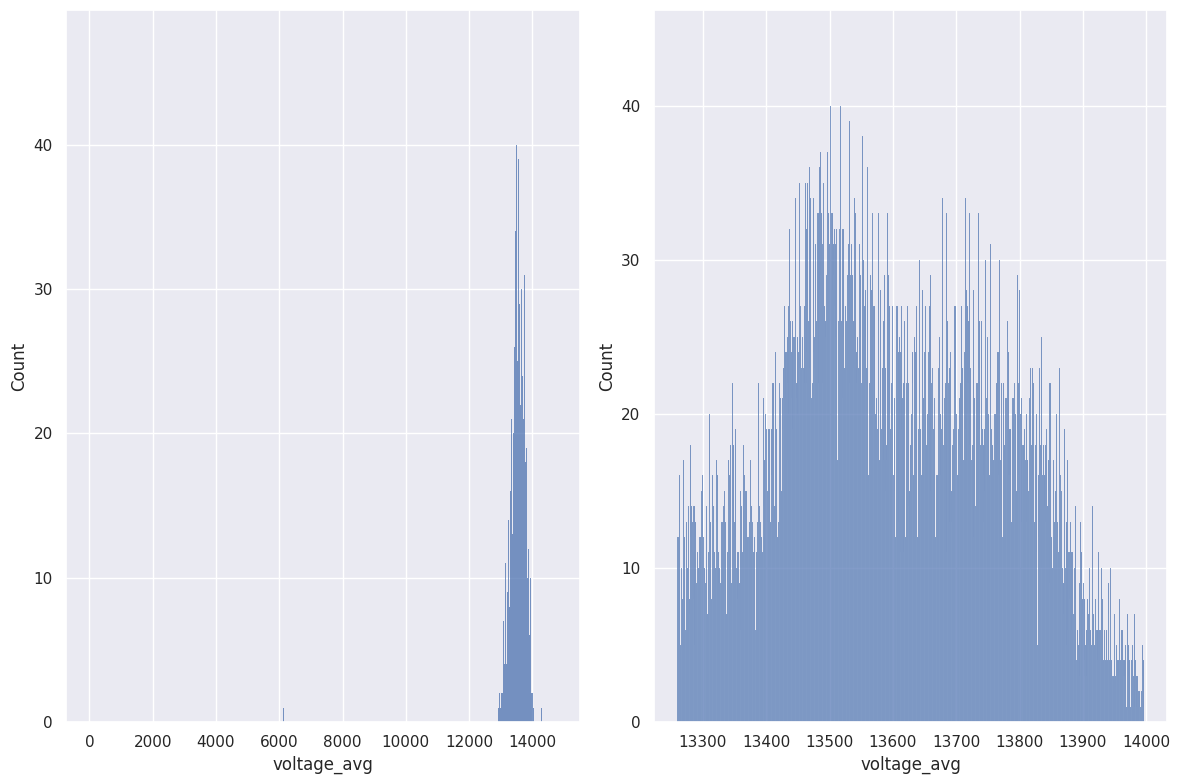

In [55]:
fig, axs = plt.subplots(1,2, figsize=(12,8)) 
sns.histplot(data=frj1n_train,x='voltage_avg', binwidth=0.7, ax=axs[0])
sns.histplot(data=frj1n_99,x='voltage_avg', binwidth=0.7, ax=axs[1])
plt.tight_layout()



A continuación se observa que el valor mínimo de las features de Voltaje, ya no es cero. Con eso se comprueba el funcionamiento de outliers (también gráficamente arriba)

In [56]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000


In [57]:
frj1n_99_bk = frj1n_99

# Transformaciones Variables Numericas 💻

## Min Max Scaler

### Feature: voltage_avg

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
mm_scaler = MinMaxScaler()

In [60]:
col_name = 'voltage_avg'
trans_col_name = 'voltage_avg_mm'
frj1n_train[trans_col_name] = mm_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name] = mm_scaler.fit_transform(frj1n_99[[col_name]])

<Axes: xlabel='voltage_avg_mm', ylabel='Count'>

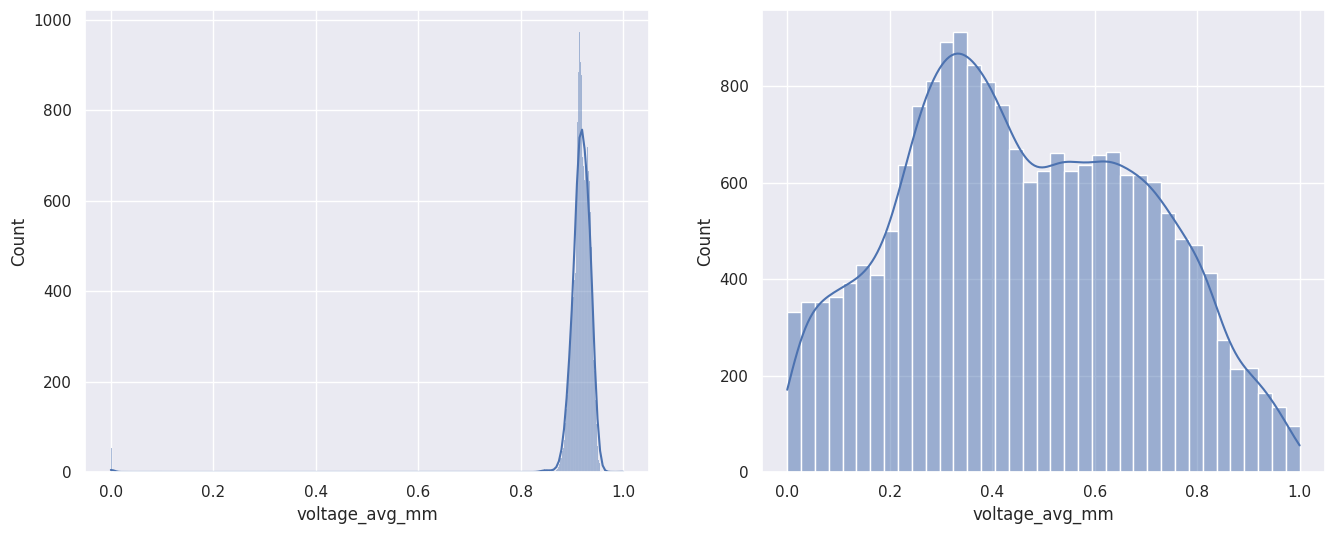

In [61]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Se utiliza el condificador MinMax Scaler ya que los datos se encuentran dentro de un rango de operacion definidos con una distribucion que se asemeja a la normal con un sesgo hacia la izquierda, es decir bajo voltaje, que podria ser provocado por la red electrica del lado del distribuidor.



> Se realiza la comparación del MinMax Scaler sin y con limpieza de outliers, donde se evidencia una mejor distribución





## Standar Scaler o Normalizacion

### Feature: voltage_avg

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sd_scaler = StandardScaler( )
sd_scaler2 = StandardScaler(with_mean=False, with_std=True)

In [64]:
col_name = 'voltage_avg'
trans_col_name = 'voltage_avg_sd'
frj1n_train[trans_col_name]= sd_scaler.fit_transform(frj1n_train[['voltage_avg']])
frj1n_99[trans_col_name]= sd_scaler.fit_transform(frj1n_99[['voltage_avg']])
frj1n_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(frj1n_99[['voltage_avg']])

<Axes: xlabel='voltage_avg_sd_2', ylabel='Count'>

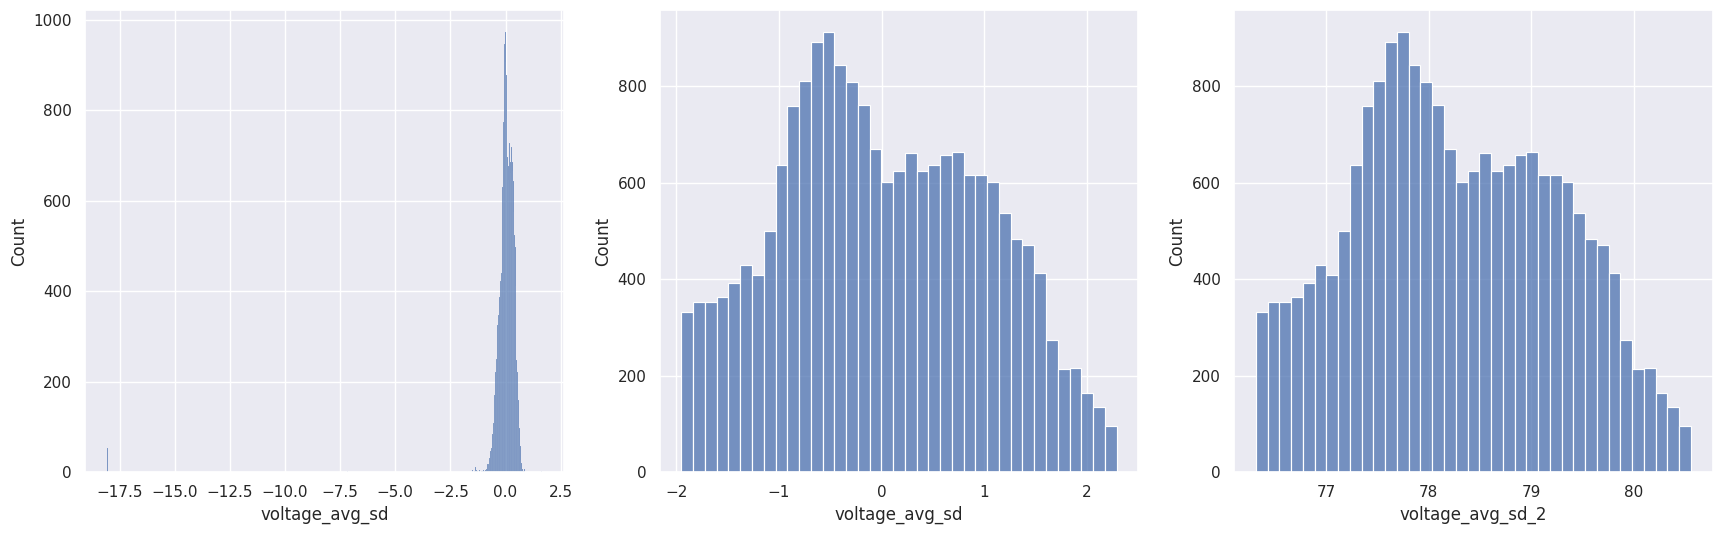

In [65]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=frj1n_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Los datos se encuentran centrados a cero, y escalados de acuerdo a la varianza. Este tipo de normalizacion se ve afectada por los datos atipicos en el set de datos, y a pesar de que fueron eliminados antes de realizar la codificacion vemos que ahora tenemos valores negativos en los predictores por lo que se considera mejor utilizar el escaldo MinMax ya que el rango nos queda entre 0 y 1 o bien tomar la escala respecto a la desviación estándard



## Robust Scaler

In [66]:
from sklearn.preprocessing import RobustScaler

In [67]:
rb_scaler = RobustScaler ( )

In [68]:
frj1n_99.describe()


,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763


### Feature: current_avg

In [69]:
col_name = 'current_avg'
trans_col_name = 'current_avg_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

In [70]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2,current_avg_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309,-0.680318
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026,2.210794
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417,-18.618066
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720,-0.562729
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470,0.437271
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763,1.736286


<Axes: xlabel='current_avg_rb', ylabel='Count'>

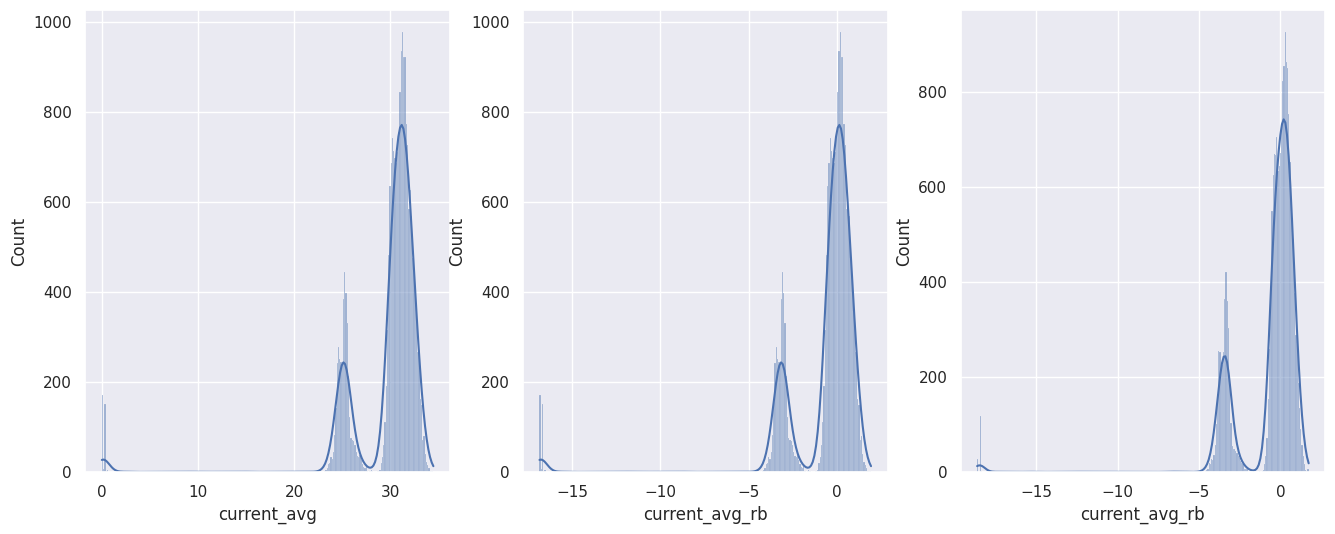

In [71]:
fig, axes = plt.subplots(ncols=3, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name, ax=axes[0], kde=True)
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[1], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[2],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')


Observación: se tiene las siguientes gráficas en comparación:


1.   Distribución de la Corriente Promedio
2.   Distribución de la Corriente Promedio transformada con RobustScaler
3.   Distribución de la Corriente Promedio transformada con RobustScaler y con limpieza de outliers

De lo anterior, no se observa diferencia significativa, concluyendo que esta transformación no brinda ningún beneficio. Para obtener un mejor resultado con este método de transformación, necesitaríamos recortar más los datos para abarcar la densidad principal, pero implicaría perder muchos valores del Dataset completo. Posiblemente una transformación tipo Yeo Johnson brinde mejores resultados debido a la distribución que tenemos.

## Transformacion Box Cox / Yeo Johnson

In [72]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2,current_avg_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309,-0.680318
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026,2.210794
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417,-18.618066
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720,-0.562729
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470,0.437271
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763,1.736286


In [73]:
from sklearn.preprocessing import PowerTransformer

In [74]:
bx_transformer = PowerTransformer(method='box-cox')
bx1_transformer = PowerTransformer(method='yeo-johnson')

### Feature: true_power

In [75]:
col_name1 = 'true_power'
trans_col_name1 = 'true_power_bx'
#frj1n[trans_col_name]= bx_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name1]= bx1_transformer.fit_transform(frj1n_99[[col_name1]])

<Axes: xlabel='true_power_bx', ylabel='Count'>

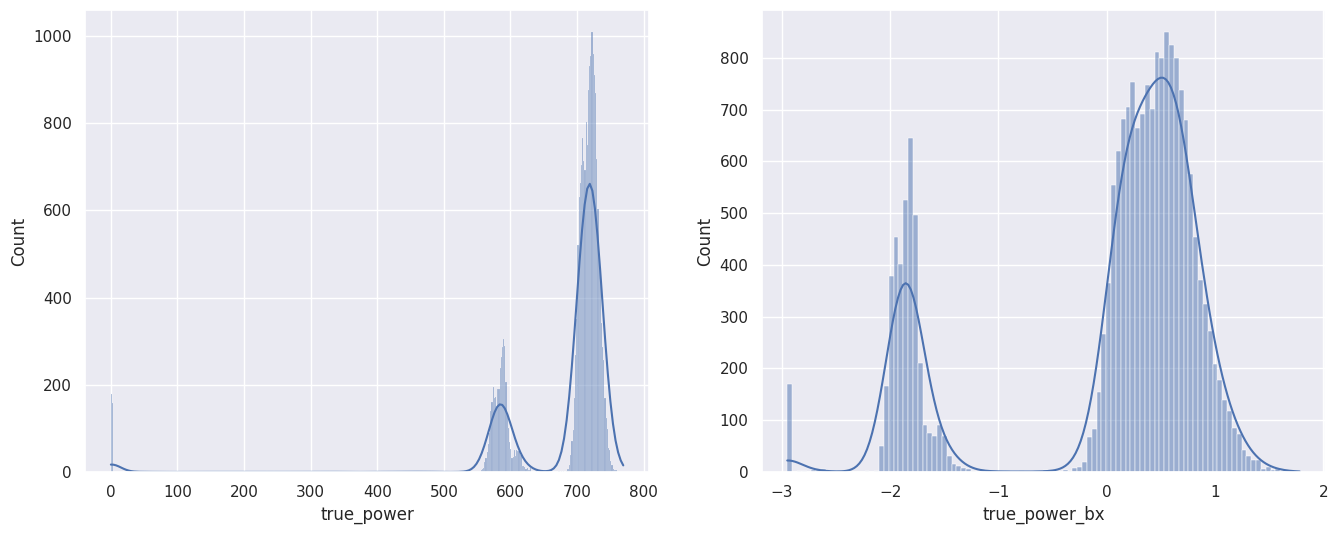

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name1, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name1, ax=axes[1],kde=True)

### Feature: reactive_power

In [77]:
col_name2 = 'reactive_power'
trans_col_name2 = 'reactive_power_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name2]= bx1_transformer.fit_transform(frj1n_99[[col_name2]])


<Axes: xlabel='reactive_power_bx', ylabel='Count'>

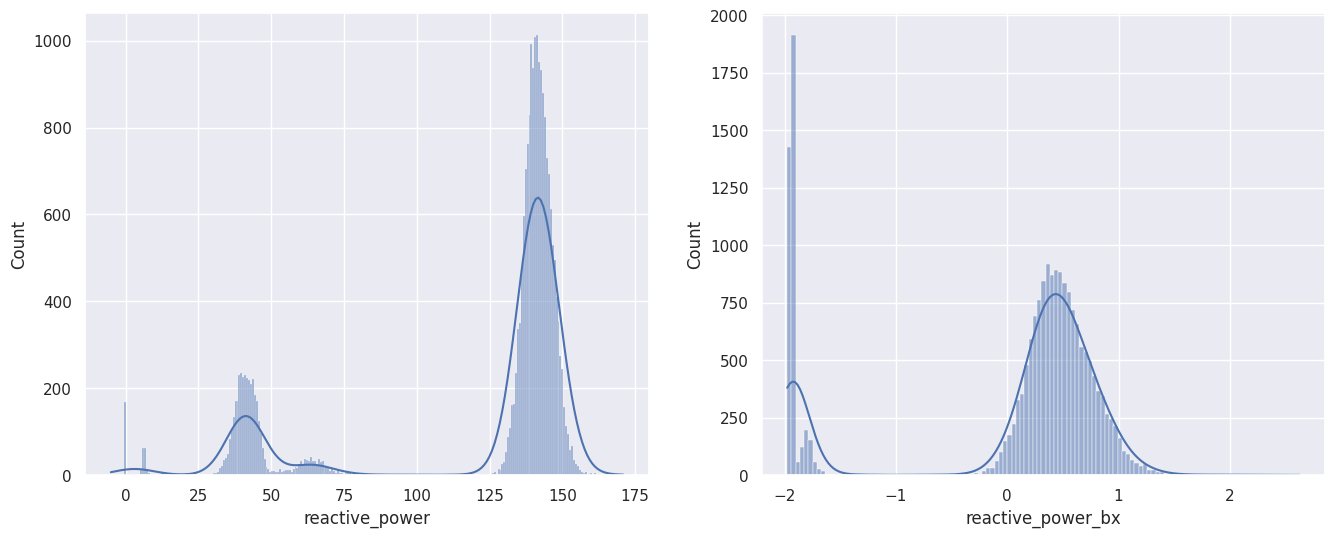

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name2, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name2, ax=axes[1],kde=True)

### Feature: apparent_power

In [79]:
col_name3 = 'apparent_power'
trans_col_name3 = 'apparent_power_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name3]= bx1_transformer.fit_transform(frj1n_99[[col_name3]])

<Axes: xlabel='apparent_power_bx', ylabel='Count'>

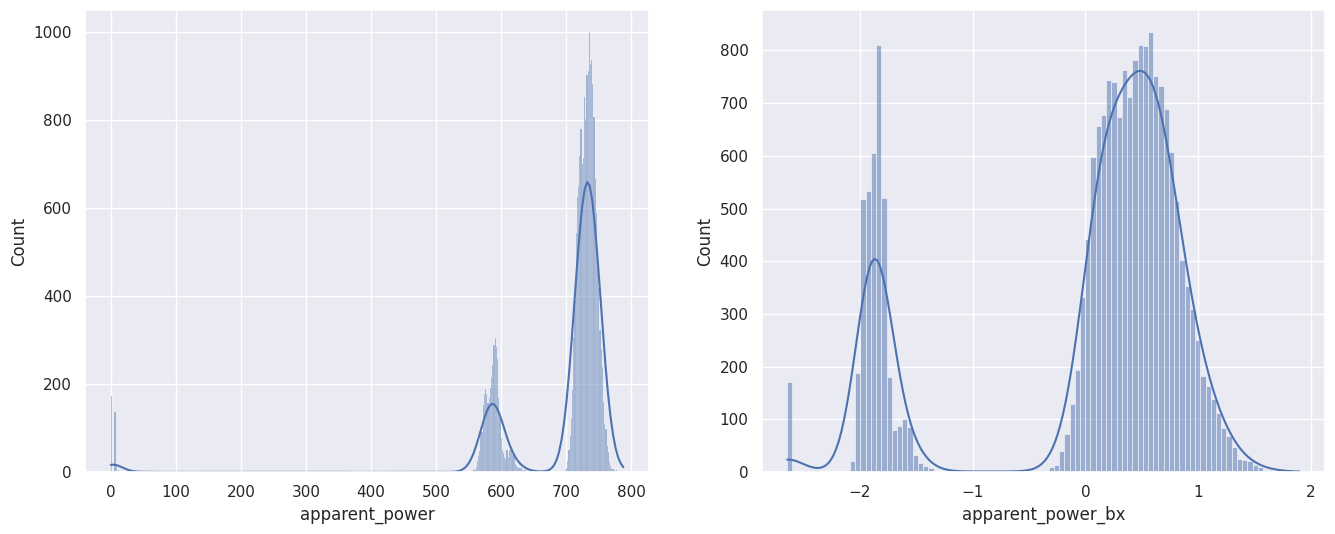

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name3, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name3, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

# No se grafica el set de datos original porque las variables originales tiene valores negativos



> La potencia y la corriente tienen un comportamiento muy similar ya que son directamente proporcionales P = 1.73*V*I (P = Potencia,  V = voltaje, I = Corriente, 1.73 = Constante para sistemas trifasicos, que es igual a la raiz de 3).  Se utilizó la transformacion de potencia para tener la disponibilidad de aplicar la misma transformacion al triangulo de potencias, con la idea de aplicar el metodo Box Cox a las potencias Activa (kW) y Aparente (kVA) y el metodo Yeo Johnson a la potencia Reactiva (kVAR) ya que puede tener valores negativos.  Al final de dejaron todas las transfomaciones con el segundo metodos por un tema que aun debemos de corregir respecto a valores negativos indicados para la potencia activa. 



### Feature: current_avg

In [81]:
col_name4 = 'current_avg'
trans_col_name4 = 'current_avg_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name4]= bx1_transformer.fit_transform(frj1n_99[[col_name4]])

<Axes: xlabel='current_avg_bx', ylabel='Count'>

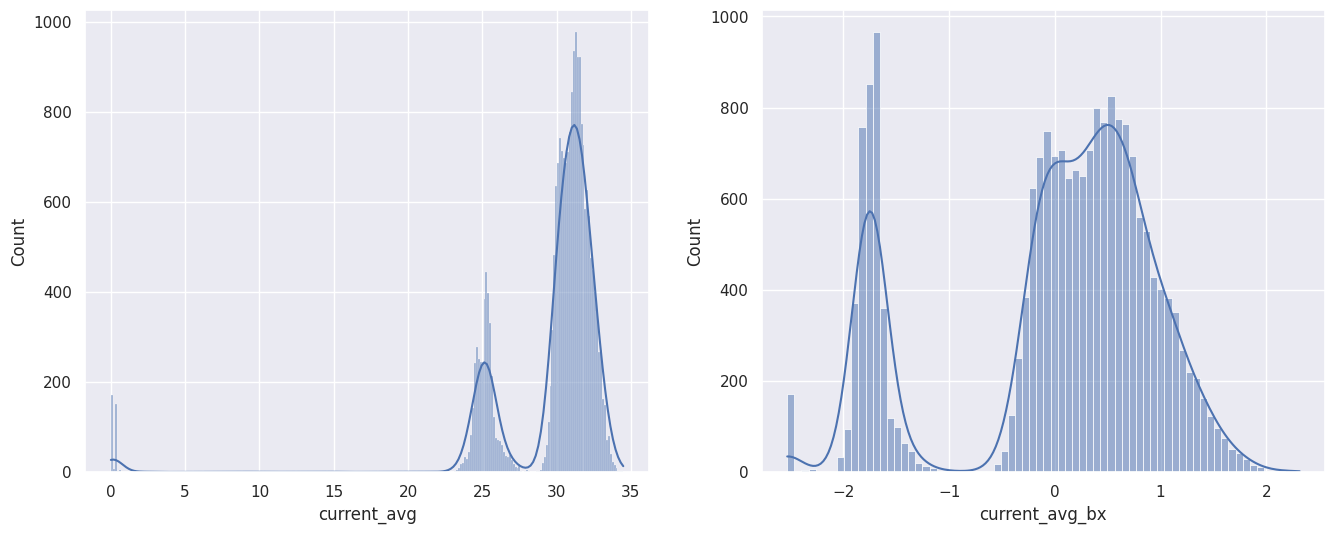

In [82]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name4, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name4, ax=axes[1],kde=True)

# Transformacion Variables Categoricas 💻

In [83]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 21933
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19542 non-null  datetime64[ns]
 1   voltage_ab         19542 non-null  float64       
 2   voltage_bc         19542 non-null  float64       
 3   voltage_ca         19542 non-null  float64       
 4   voltage_avg        19542 non-null  float64       
 5   voltage_unbalance  19542 non-null  float64       
 6   current_a          19542 non-null  float64       
 7   current_b          19542 non-null  float64       
 8   current_c          19542 non-null  float64       
 9   current_avg        19542 non-null  float64       
 10  true_power         19542 non-null  float64       
 11  reactive_power     19542 non-null  float64       
 12  apparent_power     19542 non-null  float64       
 13  frequency          19542 non-null  float64       
 14  commut

## Binary Encoder

Para variables que son categoricas y binarias

In [85]:
from category_encoders import BinaryEncoder

In [86]:
bin_encoder = BinaryEncoder()

In [87]:
col_k = "kvar_warn"
col_f = "frequency_error"

### Feature: kvar_warn

In [88]:
kvarwarning = bin_encoder.fit_transform(frj1n_99[col_k])
kvarwarning

,kvar_warn_0,kvar_warn_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
21929,0,1
21930,0,1
21931,0,1
21932,0,1


In [89]:
frj1n_99 = frj1n_99.join(kvarwarning)

In [141]:
frj1n_99['kvar_warn_0'].value_counts()

0    18915
1      627
Name: kvar_warn_0, dtype: int64

In [142]:
frj1n_99['kvar_warn_1'].value_counts()

1    18915
0      627
Name: kvar_warn_1, dtype: int64

### Feature: frequency_error

In [90]:
frequencyuency = bin_encoder.fit_transform(frj1n_99[col_f])
frequencyuency

,frequency_error_0,frequency_error_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
21929,0,1
21930,0,1
21931,0,1
21932,0,1


In [91]:
frj1n_99 = frj1n_99.join(frequencyuency)

In [143]:
frj1n_99['frequency_error_0'].value_counts()

0    19533
1        9
Name: frequency_error_0, dtype: int64

In [144]:
frj1n_99['frequency_error_1'].value_counts()

1    19533
0        9
Name: frequency_error_1, dtype: int64

In [92]:
frj1n_99.shape

(19542, 33)

In [93]:
frj1n_99

,date,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,...,voltage_avg_sd_2,current_avg_rb,true_power_bx,reactive_power_bx,apparent_power_bx,current_avg_bx,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
0,2022-12-01 12:15:00,13549.370,13617.111,13562.88700,13576.46000,0.274549,26.343248,23.478584,23.260210,24.360676,...,78.142179,-3.893461,-1.998993,-1.949139,-1.982687,-1.883402,0,1,0,1
1,2022-12-01 12:00:00,13536.819,13605.025,13551.66700,13564.50800,0.289523,26.191860,23.433203,23.140800,24.255283,...,78.073387,-3.957165,-2.024482,-1.954492,-2.003651,-1.900531,0,1,0,1
2,2022-12-01 11:45:00,13525.006,13588.523,13539.64400,13551.05200,0.297547,26.440498,23.728947,23.377136,24.515530,...,77.995938,-3.799861,-1.974794,-1.944387,-1.963230,-1.857522,0,1,0,1
3,2022-12-01 11:30:00,13517.328,13586.898,13539.01900,13547.75900,0.328185,26.215769,23.377346,23.132750,24.241957,...,77.976985,-3.965220,-2.033259,-1.957372,-2.011088,-1.902670,0,1,0,1
4,2022-12-01 11:15:00,13527.545,13599.054,13550.37300,13558.99100,0.325932,26.574001,23.642118,23.445925,24.554014,...,78.041633,-3.776600,-1.963788,-1.945700,-1.954817,-1.850957,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,2022-04-17 02:00:00,13794.535,13866.513,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,...,79.626853,-0.359798,0.238784,0.346548,0.228851,-0.070333,0,1,0,1
21930,2022-04-17 01:45:00,13868.192,13957.829,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,...,80.084795,-0.331252,0.350395,0.644102,0.361570,-0.046275,0,1,0,1
21931,2022-04-17 01:30:00,13858.353,13957.397,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,80.066020,-0.386413,0.299738,0.498783,0.300279,-0.092587,0,1,0,1
21932,2022-04-17 01:15:00,13815.879,13915.195,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,...,79.837432,-0.409220,0.230112,0.439891,0.228273,-0.111521,0,1,0,1


In [94]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 21933
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19542 non-null  datetime64[ns]
 1   voltage_ab         19542 non-null  float64       
 2   voltage_bc         19542 non-null  float64       
 3   voltage_ca         19542 non-null  float64       
 4   voltage_avg        19542 non-null  float64       
 5   voltage_unbalance  19542 non-null  float64       
 6   current_a          19542 non-null  float64       
 7   current_b          19542 non-null  float64       
 8   current_c          19542 non-null  float64       
 9   current_avg        19542 non-null  float64       
 10  true_power         19542 non-null  float64       
 11  reactive_power     19542 non-null  float64       
 12  apparent_power     19542 non-null  float64       
 13  frequency          19542 non-null  float64       
 14  commut



> Las variables predictoras de frecuencia (frequency_error) y Potencia reactiva (kvar_warn) unicamente tienen dos categorias: cumple o no cumple una determinada condicion propia de cada una. Por tal motivo se utilizó la codificacion Binaria para ambas para evaluar en en entrenamiento del modelo.

Sin embargo, es de notar que las transformaciones se encuentran altamente desbalanceadas. Por lo que no logran representar bien las dos categorías, sino prácticamente se quedan solo con una. Para fines de modelado, esto no brinda ningún beneficio o peso sobre la variable respuesta.



## Limpieza de Dataset 

### Se elimnan variables ya codificadas

In [95]:
df_frj = pd.DataFrame(data=frj1n_99)
del df_frj['date']
del df_frj['voltage_ab']
del df_frj['voltage_bc']
del df_frj['voltage_ca']
del df_frj['voltage_avg']
del df_frj['kvar_warn']
del df_frj['frequency_error']
del df_frj['current_avg']
del df_frj['true_power']
del df_frj['frequency']
del df_frj['current_a']
del df_frj['current_b']
del df_frj['current_c']
del df_frj['reactive_power']
del df_frj['apparent_power']
del df_frj['voltage_unbalance']
del df_frj['vclasif_ab']
del df_frj['vclasif_bc']
del df_frj['vclasif_ca']
del df_frj['voltage_avg_sd_2']



In [96]:
df_frj

,commute,vclasif_avg,voltage_avg_mm,voltage_avg_sd,current_avg_rb,true_power_bx,reactive_power_bx,apparent_power_bx,current_avg_bx,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
0,0,Normal,0.430435,-0.125130,-3.893461,-1.998993,-1.949139,-1.982687,-1.883402,0,1,0,1
1,0,Normal,0.414208,-0.193922,-3.957165,-2.024482,-1.954492,-2.003651,-1.900531,0,1,0,1
2,0,Normal,0.395939,-0.271371,-3.799861,-1.974794,-1.944387,-1.963230,-1.857522,0,1,0,1
3,0,Normal,0.391468,-0.290325,-3.965220,-2.033259,-1.957372,-2.011088,-1.902670,0,1,0,1
4,0,Normal,0.406717,-0.225677,-3.776600,-1.963788,-1.945700,-1.954817,-1.850957,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,0,Normal,0.780648,1.359544,-0.359798,0.238784,0.346548,0.228851,-0.070333,0,1,0,1
21930,0,Normal,0.888670,1.817486,-0.331252,0.350395,0.644102,0.361570,-0.046275,0,1,0,1
21931,0,Normal,0.884241,1.798710,-0.386413,0.299738,0.498783,0.300279,-0.092587,0,1,0,1
21932,0,Normal,0.830320,1.570122,-0.409220,0.230112,0.439891,0.228273,-0.111521,0,1,0,1


### Dataset solo con varibles transformadas y escaladas

In [97]:
df_frj.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 21933
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   commute            19542 non-null  int64  
 1   vclasif_avg        19542 non-null  object 
 2   voltage_avg_mm     19542 non-null  float64
 3   voltage_avg_sd     19542 non-null  float64
 4   current_avg_rb     19542 non-null  float64
 5   true_power_bx      19542 non-null  float64
 6   reactive_power_bx  19542 non-null  float64
 7   apparent_power_bx  19542 non-null  float64
 8   current_avg_bx     19542 non-null  float64
 9   kvar_warn_0        19542 non-null  int64  
 10  kvar_warn_1        19542 non-null  int64  
 11  frequency_error_0  19542 non-null  int64  
 12  frequency_error_1  19542 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 2.6+ MB


In [98]:
df_frj.describe()

,commute,voltage_avg_mm,voltage_avg_sd,current_avg_rb,true_power_bx,reactive_power_bx,apparent_power_bx,current_avg_bx,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
count,19542.000000,19542.000000,1.954200e+04,19542.000000,1.954200e+04,1.954200e+04,1.954200e+04,1.954200e+04,19542.000000,19542.000000,19542.000000,19542.000000
mean,0.007829,0.459951,4.057751e-16,-0.680318,-4.421349e-16,1.163513e-16,9.308103e-17,1.047162e-16,0.032085,0.967915,0.000461,0.999539
std,0.088138,0.235891,1.000026e+00,2.210794,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,0.176230,0.176230,0.021456,0.021456
min,0.000000,0.000000,-1.949892e+00,-18.618066,-2.949778e+00,-1.976501e+00,-2.643618e+00,-2.531394e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.282190,-7.535890e-01,-0.562729,2.953918e-02,8.968386e-02,1.075540e-02,-2.357630e-01,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.440766,-8.133208e-02,0.000000,3.603906e-01,3.819623e-01,3.527618e-01,2.477574e-01,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.646574,7.911608e-01,0.437271,6.357545e-01,6.041424e-01,6.391096e-01,6.804508e-01,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,2.289454e+00,1.736286,1.782169e+00,2.625818e+00,1.899297e+00,2.316084e+00,1.000000,1.000000,1.000000,1.000000


# ALGORITMOS DE MODELADO (TRAINING DF) 🚧

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Modelos

Para fines de comparación se utilizarán los siguientes modelos:


1.   Logistic Regression
2.   KNeighborsClassifier
3.   SVC
4.   RandomForestClassifier
5.   GradientBoostingClassifier



### Definición de Función de Modelado

In [134]:
def modelado(data,labels):
  seed = 9081
  classifier_names = ['LR',
                      'kNN',
                      'RBF SVM',
                      'Random Forest',
                      'Boosted Trees']
  classifiers = [LogisticRegression(random_state=seed),
                KNeighborsClassifier(5),
                SVC(gamma=2, C=1, random_state=seed),
                RandomForestClassifier(max_depth=5, n_estimators=10, 
                                        max_features=1, random_state=seed),
                GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                            max_depth=5, random_state=seed)]
  print("Model Score: ")
  print("------------------------------------------------------")
  for model in classifiers:
    model.fit(data, labels)
    model_score = model.score(data,labels)
    print(f'{model.__class__.__name__}: {model_score}')  

  plt.figure(figsize=(10,10))
  #fig, axs = plt.subplots(5,figsize=(8,20))
  print(" ")
  print("AUC Score: ")
  print("------------------------------------------------------")
  
  for i, model in enumerate(classifiers):
      if hasattr(model, "decision_function"):
          predictions = model.decision_function(data)
      else:
          predictions = model.predict_proba(data)[:,1]
      fpr, tpr, _ = roc_curve(labels, predictions) # sklearn.metrics.roc_curve
      auc_score = roc_auc_score(labels, predictions)
      print(f'{model.__class__.__name__}: {auc_score}')
      plt.plot(fpr, tpr, label=classifier_names[i])   
      #axs[i].plot(fpr, tpr, label=classifier_names[i])        
      #axs[i].plot([0, 1.09], [0, 1.09], 'k--')
      #axs[i].legend()
      #axs[i].set(xlabel='False Positive Rate')
  print(" ")
  print("Graphs: ")
  print("------------------------------------------------------")
      
  plt.plot([0, 1], [0, 1], 'k--')
  plt.legend()
  plt.xlabel('False Positive Rate', fontsize=14)
  plt.ylabel('True Positive Rate', fontsize=14)
  #fig.text(0.04, 0.5, 'True Positive Rate', va='center', rotation='vertical')

## Modelado con DF training sin transformaciones

### Modelado con feature: VOLTAGE_AVG


*   voltage_avg: voltaje promedio de las tres fases

In [101]:
data=frj1n_train[['voltage_avg']]
labels=frj1n_train['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9907905534786177
KNeighborsClassifier: 0.9911096927145071
SVC: 0.9913376493115711
RandomForestClassifier: 0.9910641013950944
GradientBoostingClassifier: 0.993480441323972
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.6912429405557894
KNeighborsClassifier: 0.9844258273149237
SVC: 0.6436075240599708
RandomForestClassifier: 0.8072030249684273
GradientBoostingClassifier: 0.8460076439725694
 
Graphs: 
------------------------------------------------------


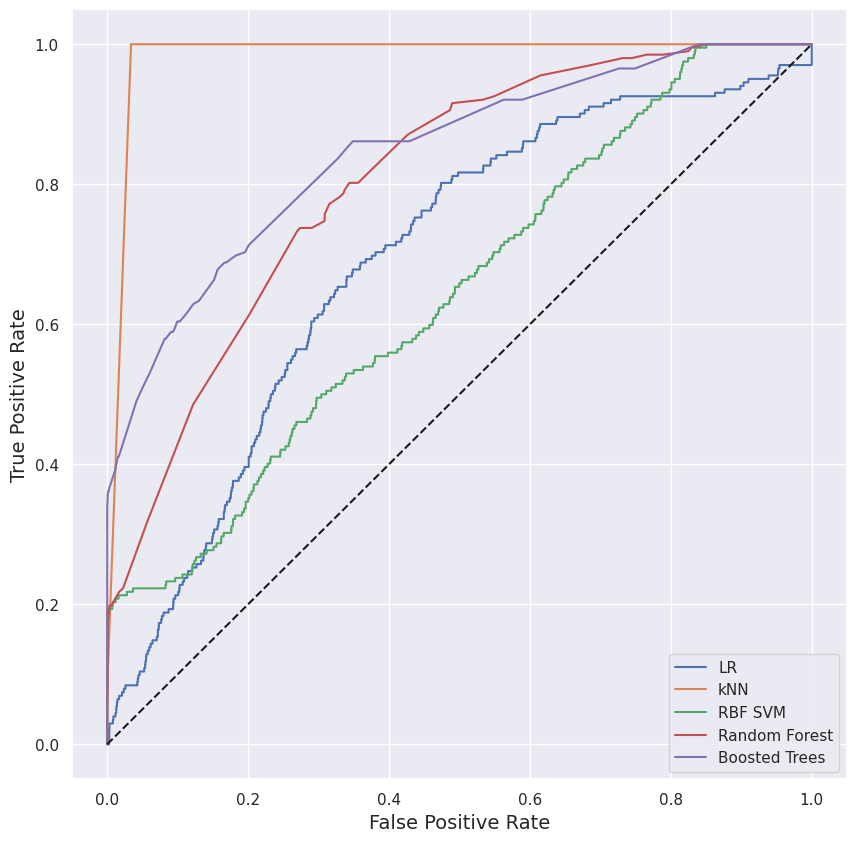

In [102]:
modelado(data,labels)

### Modelado con features: TRUE_POWER

*   true_power: potencia activa 

In [103]:
data=frj1n_train[['true_power']]
labels=frj1n_train['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9906081882009665
KNeighborsClassifier: 0.9989969909729187
SVC: 0.9996352694446977
RandomForestClassifier: 0.9991337649311571
GradientBoostingClassifier: 0.998723443056442
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9899841999661037
KNeighborsClassifier: 0.9999118423714266
SVC: 0.995757499548961
RandomForestClassifier: 0.9999576296668872
GradientBoostingClassifier: 0.8911590427402764
 
Graphs: 
------------------------------------------------------


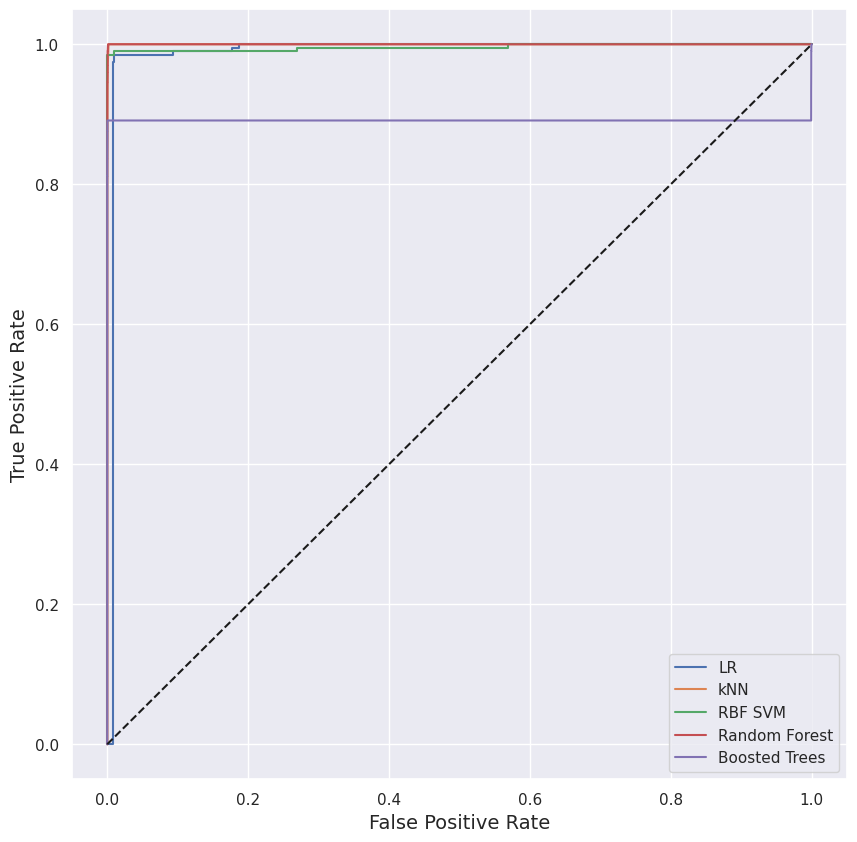

In [104]:
modelado(data,labels)

### Modelado con features: REACTIVE_POWER

*   reactive_power: potencia reactiva 

In [105]:
data=frj1n_train[['reactive_power']]
labels=frj1n_train['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9907449621592049
KNeighborsClassifier: 0.9983587125011398
SVC: 0.998723443056442
RandomForestClassifier: 0.998723443056442
GradientBoostingClassifier: 0.9992705388893954
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9731932469889727
KNeighborsClassifier: 0.9997212897711638
SVC: 0.9679910357131793
RandomForestClassifier: 0.9973731532457497
GradientBoostingClassifier: 0.9652406088206834
 
Graphs: 
------------------------------------------------------


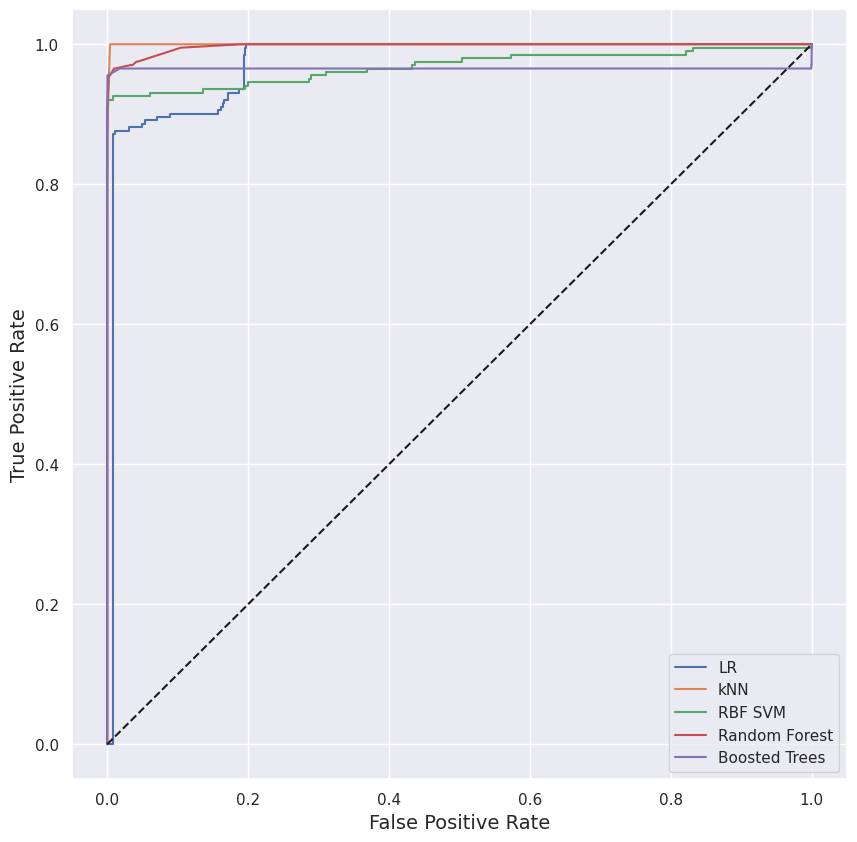

In [106]:
modelado(data,labels)

### Modelado con features: CURRENT_AVG

*   current_avg: corriente promedio de las tres fases 

In [107]:
data=frj1n_train[['current_avg']]
labels=frj1n_train['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9906081882009665
KNeighborsClassifier: 0.9990425822923316
SVC: 0.9990881736117443
RandomForestClassifier: 0.9993161302088083
GradientBoostingClassifier: 0.9913832406309838
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9896005889931898
KNeighborsClassifier: 0.9999162844224787
SVC: 0.980059518928149
RandomForestClassifier: 0.9999600215405307
GradientBoostingClassifier: 0.10619429212385621
 
Graphs: 
------------------------------------------------------


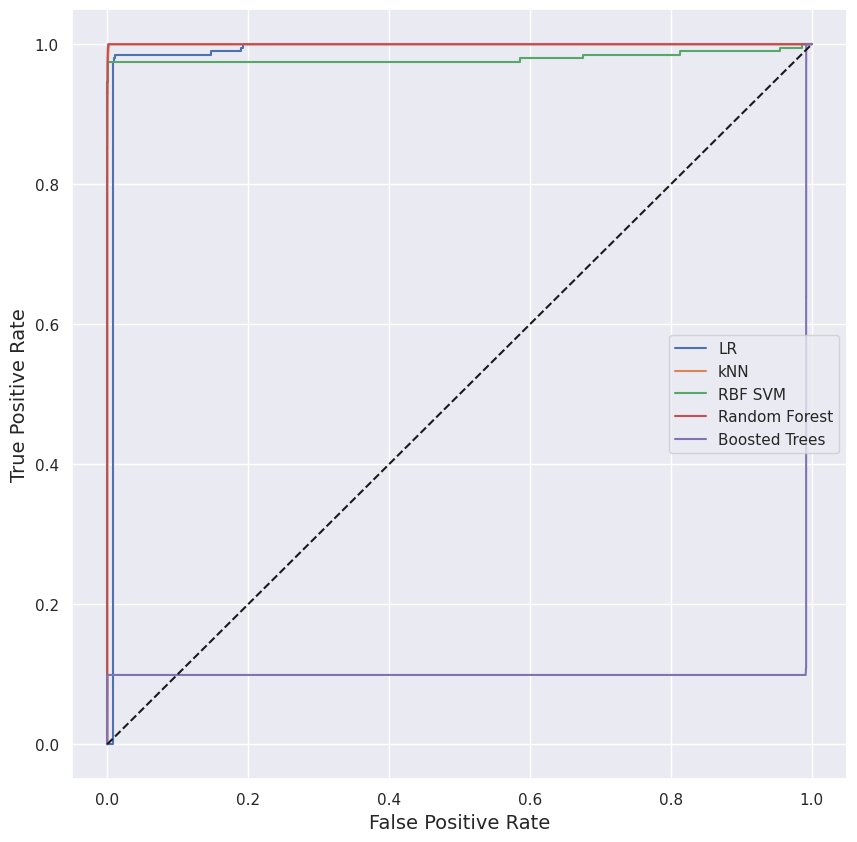

In [108]:
modelado(data,labels)

## Modelado con DF training CON transformaciones

### Modelado con feature: VOLTAGE_AVG_MM


*   voltage_avg_mm: voltaje promedio de las tres fases con transformacion MinMax

In [109]:
data=frj1n_99[['voltage_avg_mm']]
labels=frj1n_99['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9921707092416334
KNeighborsClassifier: 0.9921707092416334
SVC: 0.9921707092416334
RandomForestClassifier: 0.9922730529116774
GradientBoostingClassifier: 0.9952921911779756
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.7121878957713709
KNeighborsClassifier: 0.9857858559381254
SVC: 0.6562684454530346
RandomForestClassifier: 0.8600870987761068
GradientBoostingClassifier: 0.8930921346481413
 
Graphs: 
------------------------------------------------------


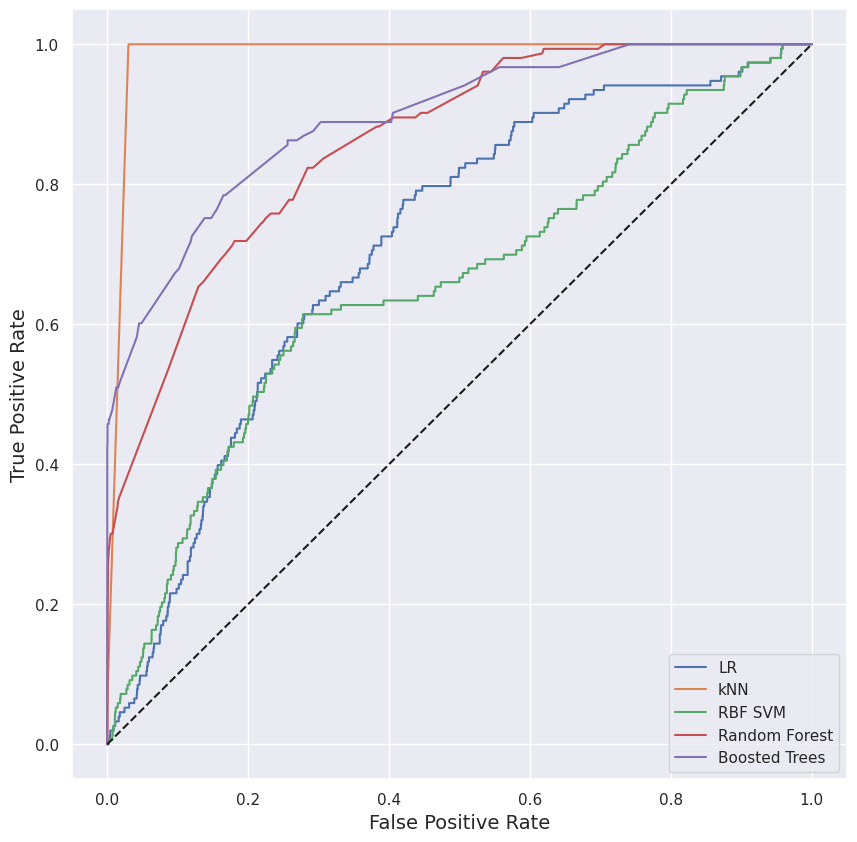

In [110]:
modelado(data,labels)

### Modelado con features: TRUE_POWER_BX

*   true_power_bx: potencia activa con transformacion Yeo-Johnson

In [111]:
data=frj1n_99[['true_power_bx']]
labels=frj1n_99['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9979531265991198
KNeighborsClassifier: 0.9992324224746699
SVC: 0.9981066421041859
RandomForestClassifier: 0.9985160167843619
GradientBoostingClassifier: 0.9985671886193839
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.995683490099669
KNeighborsClassifier: 0.9999504469382782
SVC: 0.9828044133911925
RandomForestClassifier: 0.9993809238241346
GradientBoostingClassifier: 0.9929061589736381
 
Graphs: 
------------------------------------------------------


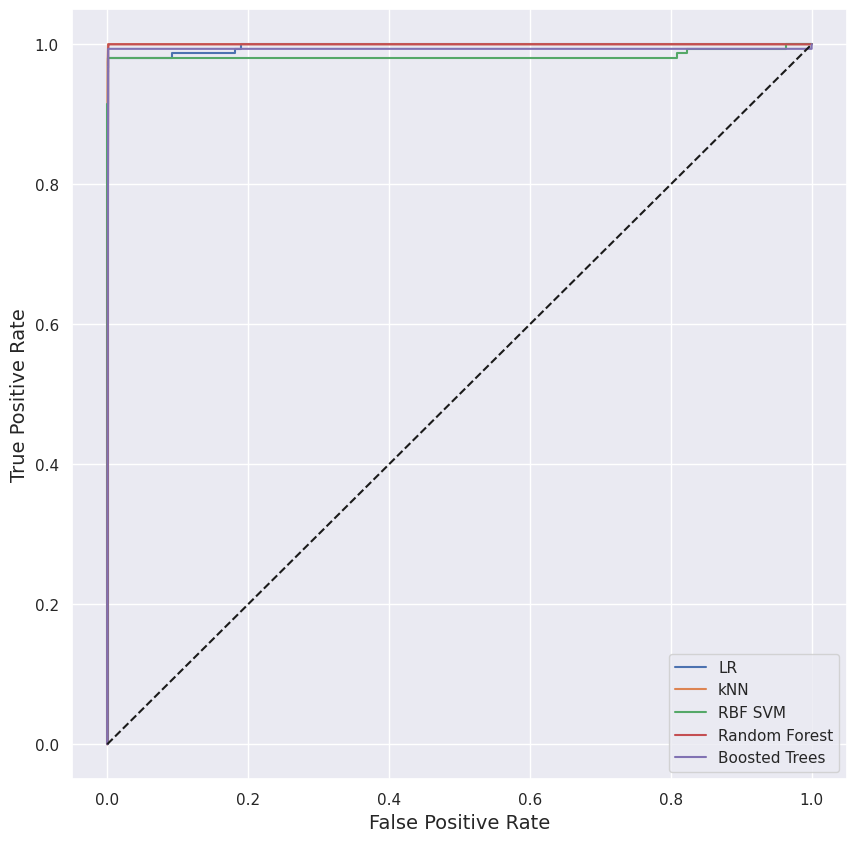

In [112]:
modelado(data,labels)

### Modelado con features: REACTIVE_POWER_BX

*   reactive_power_bx: potencia reactiva con transformacion Yeo-Johnson

In [113]:
data=frj1n_99[['reactive_power_bx']]
labels=frj1n_99['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9921707092416334
KNeighborsClassifier: 0.9988230477944939
SVC: 0.9921707092416334
RandomForestClassifier: 0.9991300788046259
GradientBoostingClassifier: 0.9997441408248899
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9759017056029007
KNeighborsClassifier: 0.9998097095010748
SVC: 0.9231624157218719
RandomForestClassifier: 0.9977746630138982
GradientBoostingClassifier: 0.9999802799040086
 
Graphs: 
------------------------------------------------------


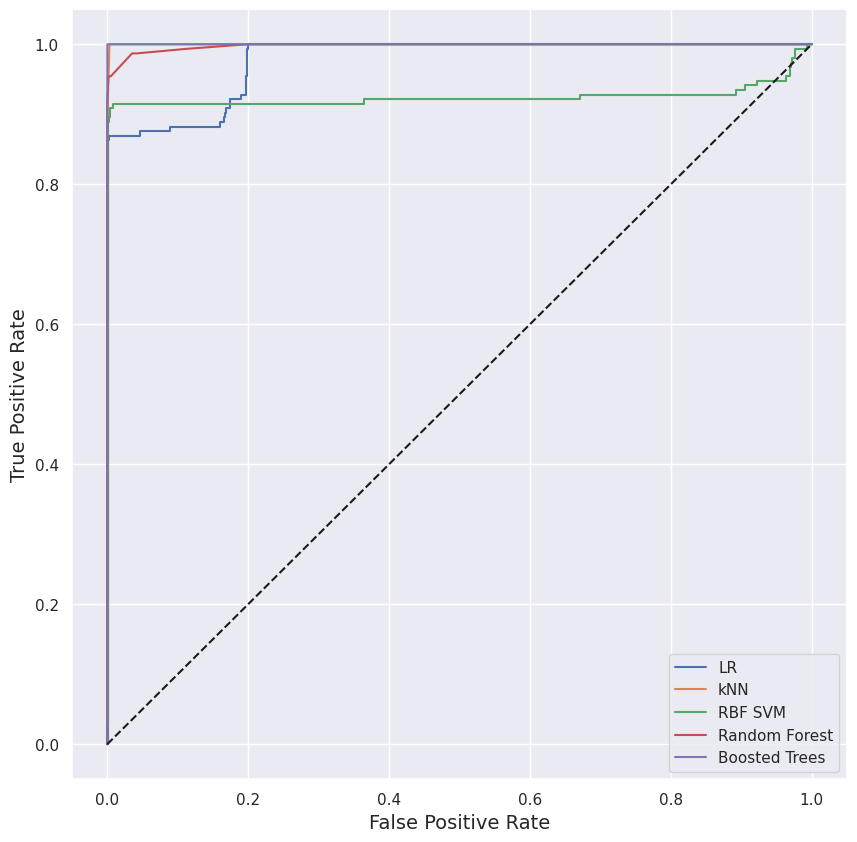

In [114]:
modelado(data,labels)

### Modelado con features: CURRENT_AVG_BX

*   current_avg_bx: corriente promedio de las tres fases con transformación Yeo-Johnson

In [115]:
data=frj1n_99[['current_avg_bx']]
labels=frj1n_99['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9979531265991198
KNeighborsClassifier: 0.999334766144714
SVC: 0.9980554702691639
RandomForestClassifier: 0.9985160167843619
GradientBoostingClassifier: 0.9984648449493398
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9951512160557313
KNeighborsClassifier: 0.9999553348253187
SVC: 0.9828060988694822
RandomForestClassifier: 0.9994068801897984
GradientBoostingClassifier: 0.9994496913383608
 
Graphs: 
------------------------------------------------------


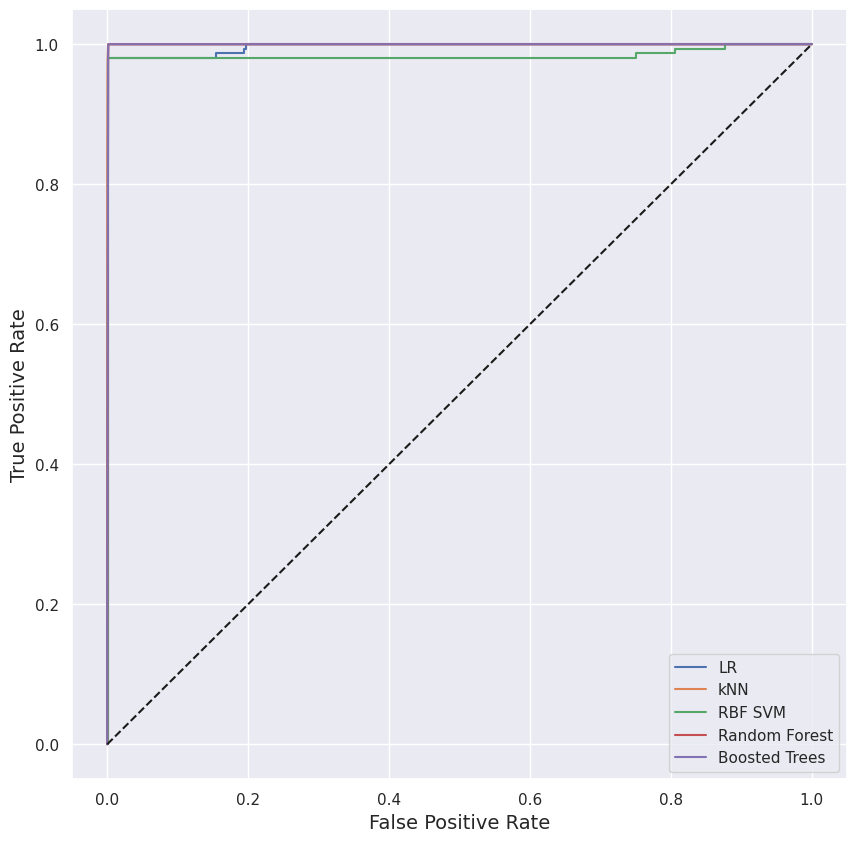

In [116]:
modelado(data,labels)

# Evaluación

### Definición de función de transformaciones

In [117]:

def transformaciones(data):
  # MinMax
  data['voltage_avg_mm'] = mm_scaler.fit_transform(data[['voltage_avg']])

  #YeoJohnson
  data['true_power_bx']= bx1_transformer.fit_transform(data[['true_power']])
  data['reactive_power_bx']= bx1_transformer.fit_transform(data[['reactive_power']])
  data['current_avg_bx']= bx1_transformer.fit_transform(data[['current_avg']])

## Transformaciones aplicadas sobre DF de Evaluación

In [118]:
df=frj1n_eval
transformaciones(df)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               7312 non-null   datetime64[ns]
 1   voltage_ab         7312 non-null   float64       
 2   voltage_bc         7312 non-null   float64       
 3   voltage_ca         7312 non-null   float64       
 4   voltage_avg        7312 non-null   float64       
 5   voltage_unbalance  7312 non-null   float64       
 6   current_a          7312 non-null   float64       
 7   current_b          7312 non-null   float64       
 8   current_c          7312 non-null   float64       
 9   current_avg        7312 non-null   float64       
 10  true_power         7312 non-null   float64       
 11  reactive_power     7312 non-null   float64       
 12  apparent_power     7312 non-null   float64       
 13  frequency          7287 non-null   float64       
 14  commute 

## Modelado con DF de evaluación CON transformaciones

### Modelado con feature: VOLTAGE_AVG_MM


*   voltage_avg_mm: voltaje promedio de las tres fases con transformacion MinMax

In [120]:
data=df[['voltage_avg_mm']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9961706783369803
KNeighborsClassifier: 0.9961706783369803
SVC: 0.9961706783369803
RandomForestClassifier: 0.9967177242888403
GradientBoostingClassifier: 0.9986323851203501
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.4934543421981643
KNeighborsClassifier: 0.9939691692162861
SVC: 0.5066731387777517
RandomForestClassifier: 0.9127515297717109
GradientBoostingClassifier: 0.9979455950419707
 
Graphs: 
------------------------------------------------------


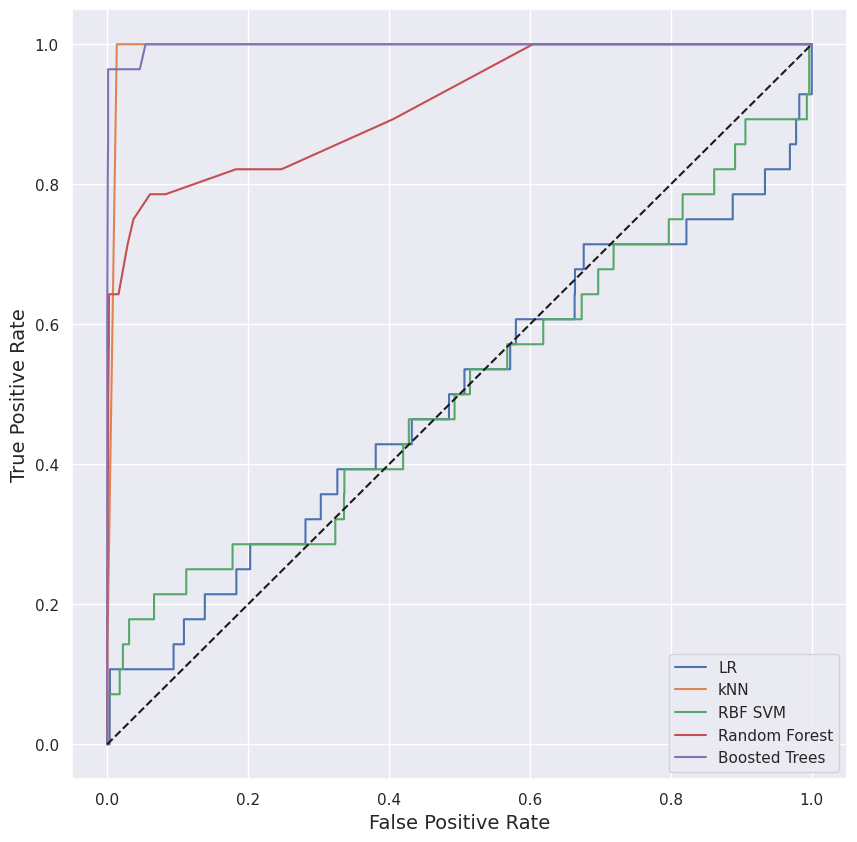

In [121]:
modelado(data,labels)

### Modelado con features: TRUE_POWER_BX

*   true_power_bx: potencia activa con transformacion Yeo-Johnson

In [122]:
data=df[['true_power_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9961706783369803
KNeighborsClassifier: 0.9986323851203501
SVC: 0.9969912472647703
RandomForestClassifier: 0.9979485776805251
GradientBoostingClassifier: 0.9980853391684902
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9826184592453127
KNeighborsClassifier: 0.9996886522318976
SVC: 0.8470816662744175
RandomForestClassifier: 0.9960407350749196
GradientBoostingClassifier: 0.5751157135012159
 
Graphs: 
------------------------------------------------------


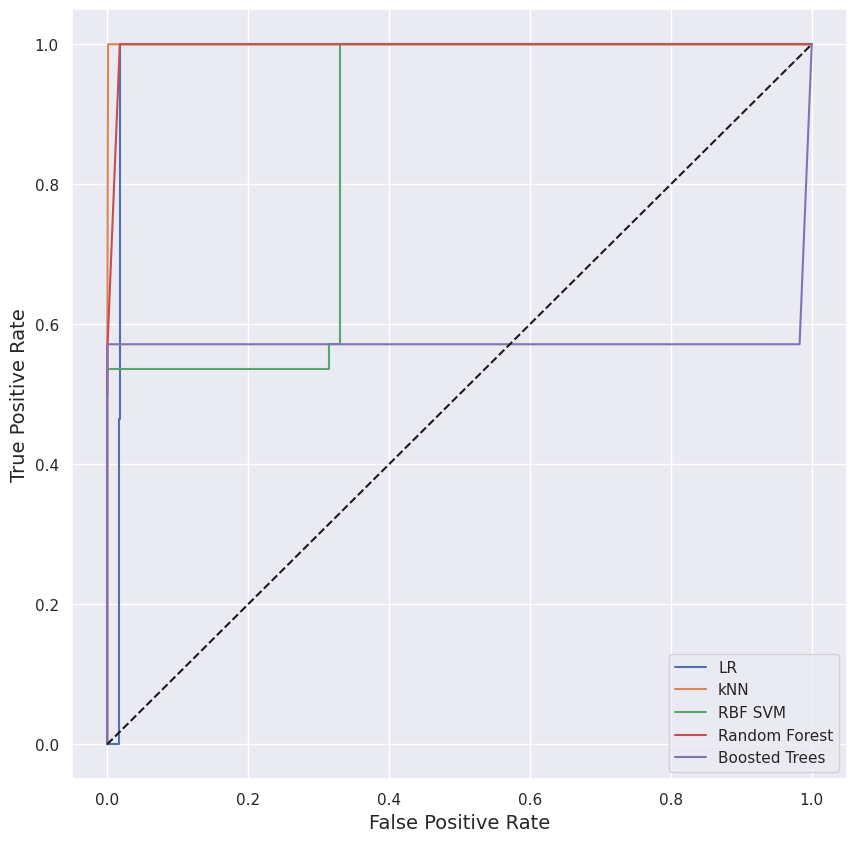

In [123]:
modelado(data,labels)


### Modelado con features: REACTIVE_POWER_BX

*   reactive_power_bx: potencia reactiva con transformacion Yeo-Johnson

In [124]:
data=df[['reactive_power_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9961706783369803
KNeighborsClassifier: 0.9978118161925602
SVC: 0.9961706783369803
RandomForestClassifier: 0.9983588621444202
GradientBoostingClassifier: 0.9976750547045952
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.974204714834863
KNeighborsClassifier: 0.9989556366203812
SVC: 0.970733309798384
RandomForestClassifier: 0.9997131678041893
GradientBoostingClassifier: 0.9996175570722523
 
Graphs: 
------------------------------------------------------


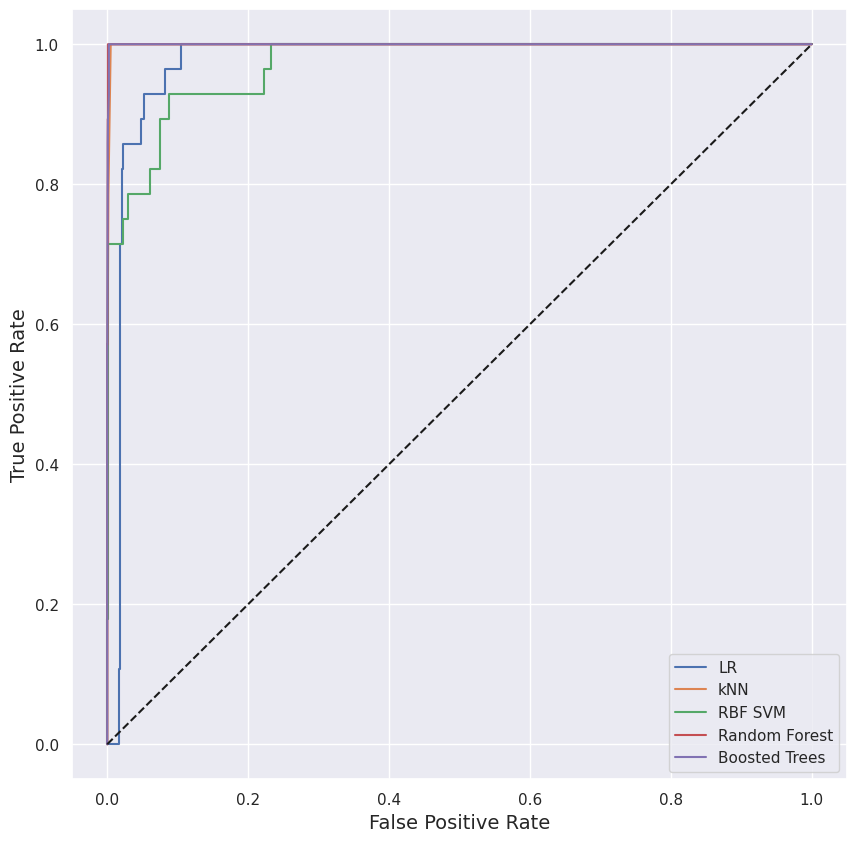

In [125]:
modelado(data,labels)


### Modelado con features: CURRENT_AVG_BX

*   current_avg_bx: corriente promedio de las tres fases con transformación Yeo-Johnson

In [126]:
data=df[['current_avg_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9961706783369803
KNeighborsClassifier: 0.9986323851203501
SVC: 0.9967177242888403
RandomForestClassifier: 0.9979485776805251
GradientBoostingClassifier: 0.9980853391684902
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9826184592453125
KNeighborsClassifier: 0.9996200086294814
SVC: 0.9579116654899191
RandomForestClassifier: 0.9960407350749196
GradientBoostingClassifier: 0.5751157135012159
 
Graphs: 
------------------------------------------------------


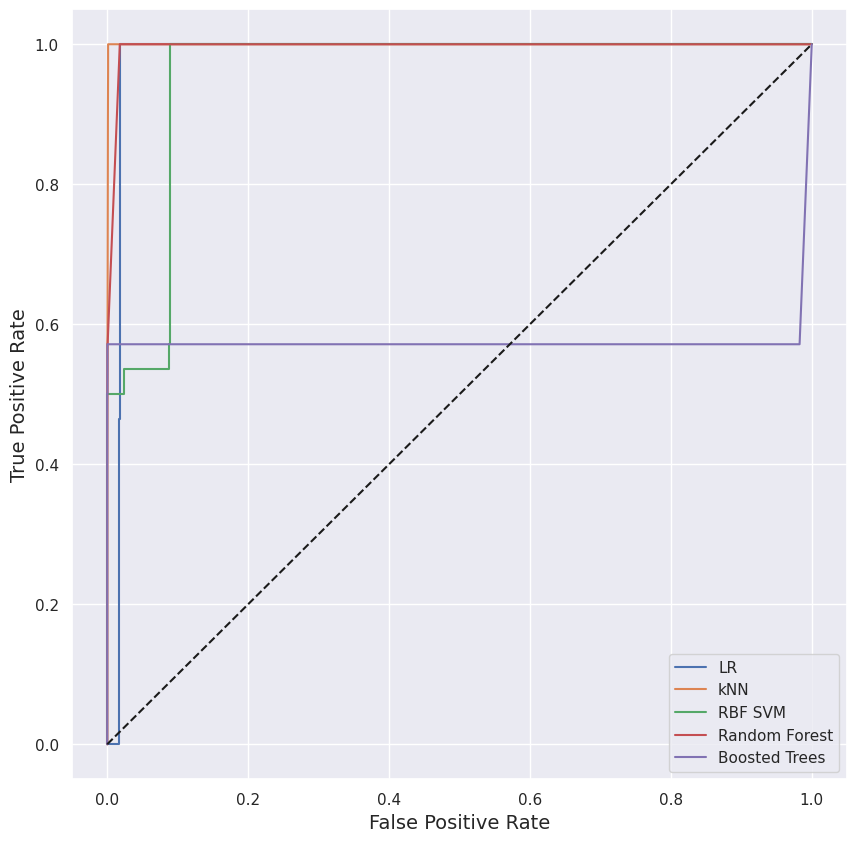

In [127]:
modelado(data,labels)


# Test

## Modelado con DF de test CON transformaciones

In [145]:
df=frj1n_test
transformaciones(df)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               7312 non-null   datetime64[ns]
 1   voltage_ab         7312 non-null   float64       
 2   voltage_bc         7312 non-null   float64       
 3   voltage_ca         7312 non-null   float64       
 4   voltage_avg        7312 non-null   float64       
 5   voltage_unbalance  7312 non-null   float64       
 6   current_a          7312 non-null   float64       
 7   current_b          7312 non-null   float64       
 8   current_c          7312 non-null   float64       
 9   current_avg        7312 non-null   float64       
 10  true_power         7312 non-null   float64       
 11  reactive_power     7312 non-null   float64       
 12  apparent_power     7312 non-null   float64       
 13  frequency          7308 non-null   float64       
 14  commute 

### Modelado con feature: VOLTAGE_AVG_MM


*   voltage_avg_mm: voltaje promedio de las tres fases con transformacion MinMax

In [147]:
data=df[['voltage_avg_mm']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9971280087527352
KNeighborsClassifier: 0.9971280087527352
SVC: 0.9971280087527352
RandomForestClassifier: 0.9978118161925602
GradientBoostingClassifier: 0.99945295404814
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.43277752741475134
KNeighborsClassifier: 0.996074743160191
SVC: 0.43332614900301086
RandomForestClassifier: 0.958268837640666
GradientBoostingClassifier: 0.9997452828340224
 
Graphs: 
------------------------------------------------------


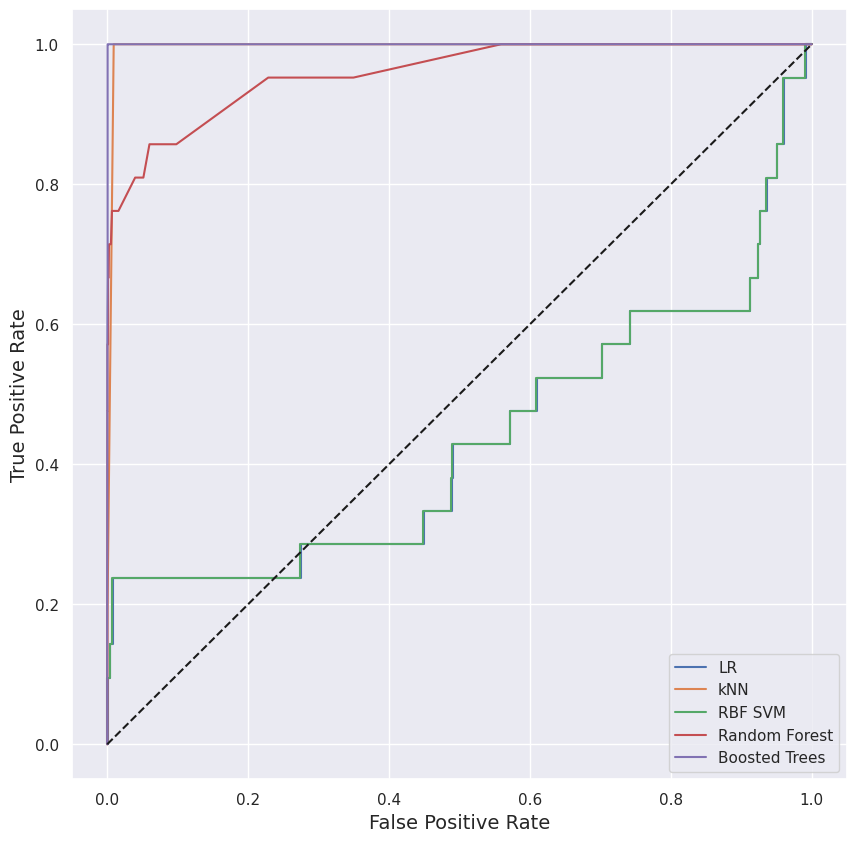

In [148]:
modelado(data,labels)

### Modelado con features: TRUE_POWER_BX

*   true_power_bx: potencia activa con transformacion Yeo-Johnson

In [149]:
data=df[['true_power_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9971280087527352
KNeighborsClassifier: 0.9987691466083151
SVC: 0.9972647702407003
RandomForestClassifier: 0.9978118161925602
GradientBoostingClassifier: 0.9975382932166302
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.988067480455356
KNeighborsClassifier: 0.9996538459026458
SVC: 0.9843838783627563
RandomForestClassifier: 0.996061680741423
GradientBoostingClassifier: 0.4790609427147625
 
Graphs: 
------------------------------------------------------


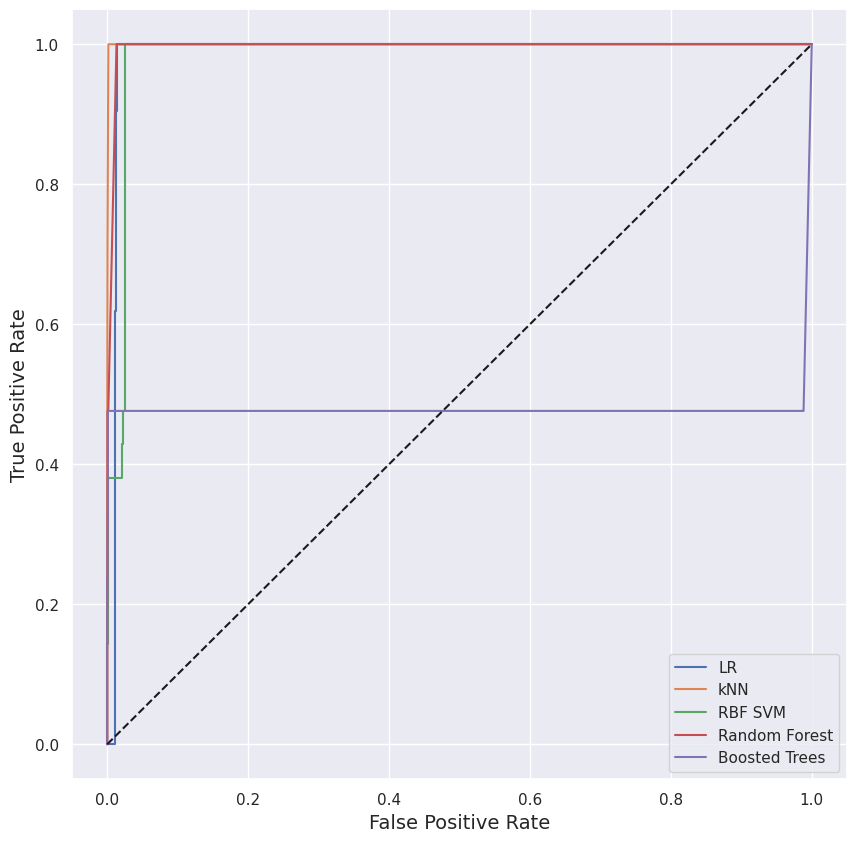

In [150]:
modelado(data,labels)

### Modelado con features: REACTIVE_POWER_BX

*   reactive_power_bx: potencia reactiva con transformacion Yeo-Johnson

In [151]:
data=df[['reactive_power_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9971280087527352
KNeighborsClassifier: 0.9987691466083151
SVC: 0.9968544857768052
RandomForestClassifier: 0.999316192560175
GradientBoostingClassifier: 0.999042669584245
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9861211800589116
KNeighborsClassifier: 0.9995558777618851
SVC: 0.8949063098013859
RandomForestClassifier: 0.9999444847202357
GradientBoostingClassifier: 0.9998726414170113
 
Graphs: 
------------------------------------------------------


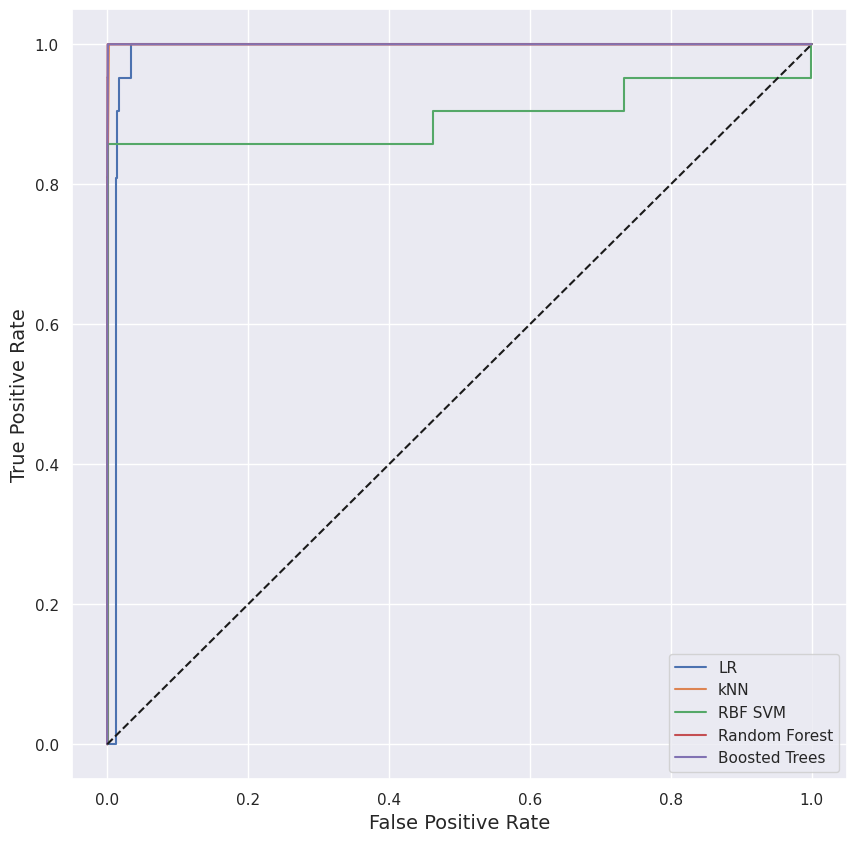

In [152]:
modelado(data,labels)

### Modelado con features: CURRENT_AVG_BX

*   current_avg_bx: corriente promedio de las tres fases con transformación Yeo-Johnson

In [153]:
data=df[['current_avg_bx']]
labels=df['commute']

Model Score: 
------------------------------------------------------
LogisticRegression: 0.9971280087527352
KNeighborsClassifier: 0.9987691466083151
SVC: 0.9972647702407003
RandomForestClassifier: 0.9980853391684902
GradientBoostingClassifier: 0.9976750547045952
 
AUC Score: 
------------------------------------------------------
LogisticRegression: 0.9881001365022761
KNeighborsClassifier: 0.9996962987636421
SVC: 0.6964816375048167
RandomForestClassifier: 0.9964698813279256
GradientBoostingClassifier: 0.4791066611804508
 
Graphs: 
------------------------------------------------------


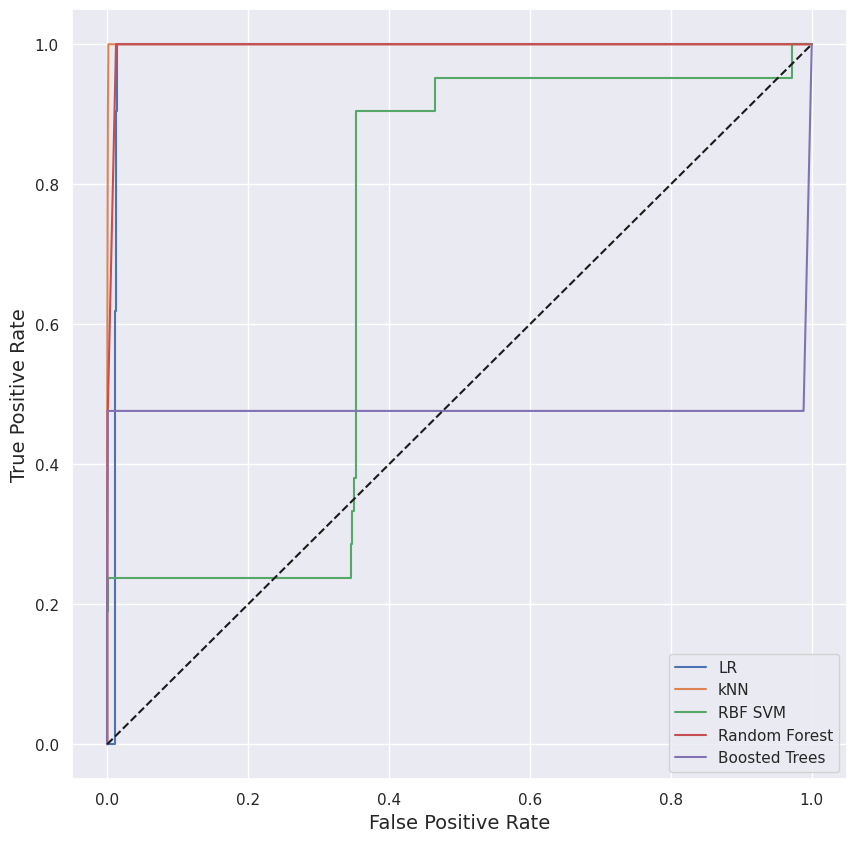

In [154]:
modelado(data,labels)

# TABLA COMPARATIVA DE RESULTADOS 🧭


## Conceptos


**Model score:**

> La función model.score(X,y) de Sklearn se basa en el coeficiente de determinación (R^2). Calcula la variable a predecir internamente y la uso para sus calculos. Básicamente nos indica que tan precisa es nuestra regresión comparada con la media.


**ROC AUC Score:**

> El área bajo la curva provee una medida de performance adicional a lo largo de los posibles thresholds de clasificacion. Una forma de interpretarlo más fácil, es la probabilidad de que el modelo clasifique un valor aleatorio positivo mejor que un valor aleatorio negativo. Un modelo en dónde sus predicciones sean 100% erróneas, tendra AUC de 0, en dónde sea 100% correctas, será de exactamente 1.





## Feature: VOLTAGE_AVG

**Model Score:** 

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9907905534786177       | 0.9921707092416334 | 0.9961706783369803 | 0.9971280087527352
KNeighborsClassifier       | 0.9911096927145071       | 0.9921707092416334 | 0.9961706783369803 | 0.9971280087527352
SVC      | 0.9913376493115711   | 0.9921707092416334 | 0.9961706783369803 | 0.9971280087527352
RandomForestClassifier       | 0.9910641013950944      | 0.9922730529116774 | 0.9967177242888403 | 0.9978118161925602
GradientBoostingClassifier       | 0.993480441323972       | 0.9952921911779756 | 0.9986323851203501 | 0.99945295404814

**AUC Score:** 

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
---------|-------------------------------|------------ | ------- | ------
LogisticRegression    | 0.6912429405557894 | 0.7121878957713709 | 0.4934543421981643 | 0.43277752741475134
KNeighborsClassifier  | 0.9844258273149237 | 0.9857858559381254 | 0.9939691692162861 | 0.996074743160191
SVC      | 0.6436075240599708   | 0.6562684454530346 | 0.5066731387777517 | 0.43332614900301086 
RandomForestClassifier | 0.8072030249684273      | 0.8600870987761068 | 0.9127515297717109 | 0.958268837640666
GradientBoostingClassifier | 0.8460076439725694  | 0.8930921346481413 | 0.9979455950419707 | 0.9997452828340224

> Observación: Utilizando el modelo de Gradient Boosting Classifier se obtuvieron los mejores resultados de AUC. También fueron buenos resultados con los modelos de KNeighnors y Random Forest. En los tres mejoró el rendimiento tras una transformación MinMax. La regresión lógica y SVC no parecen ser buenos modelos predictores a pesar de tener un alto model.score, incluso su rendimiento disminuyó con cada iteración.

## Feature: TRUE_POWER

**Model Score:** 

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9906081882009665      | 0.9979531265991198 |  0.9961706783369803 | 0.9971280087527352
KNeighborsClassifier       | 0.9989969909729187       | 0.9992324224746699 | 0.9986323851203501 | 0.9987691466083151
SVC      | 0.9996352694446977   | 0.9981066421041859 | 0.9969912472647703 | 0.9972647702407003
RandomForestClassifier       | 0.9991337649311571      | 0.9985160167843619 | 0.9979485776805251 | 0.9978118161925602
GradientBoostingClassifier       | 0.998723443056442      | 0.9985671886193839 | 0.9980853391684902 | 0.9975382932166302

**AUC Score:** 

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9899841999661037      |  0.995683490099669 | 0.9826184592453127 | 0.988067480455356
KNeighborsClassifier       | 0.9999118423714266      | 0.9999504469382782 | 0.9996886522318976 | 0.9996538459026458
SVC      | 0.995757499548961      | 0.9828044133911925 | 0.8470816662744175 | 0.9843838783627563
RandomForestClassifier       | 0.9999576296668872      | 0.9993809238241346 | 0.9960407350749196 | 0.996061680741423
GradientBoostingClassifier       | 0.8911590427402764      | 0.9929061589736381 | 0.5751157135012159 | 0.4790609427147625

> Observación: todos los modelos parecen tener buenos resultados a diferencia del Gradient Boosting, que no parece ser un buen modelo para el tipo de transformación (Yeo-Johnson), dado que sin transformación tuvo mejores resultados.

## Feature: REACTIVE_POWER

**Model Score:**

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9907449621592049     | 0.9921707092416334 | 0.9961706783369803 | 0.9971280087527352
KNeighborsClassifier       | 0.9983587125011398      | 0.9988230477944939 | 0.9978118161925602 | 0.9987691466083151
SVC      | 0.998723443056442    | 0.9921707092416334 | 0.9961706783369803 | 0.9968544857768052
RandomForestClassifier       | 0.998723443056442     | 0.9991300788046259 | 0.9983588621444202 | 0.999316192560175
GradientBoostingClassifier       | 0.9992705388893954     | 0.9997441408248899 | 0.9976750547045952 | 0.999042669584245

**AUC Score:** 

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9731932469889727    | 0.9759017056029007 |  0.974204714834863 | 0.9861211800589116
KNeighborsClassifier       | 0.9997212897711638      | 0.9998097095010748 | 0.9989556366203812 | 0.9995558777618851
SVC      | 0.9679910357131793  | 0.9231624157218719 | 0.970733309798384 | 0.8949063098013859
RandomForestClassifier       | 0.9973731532457497      | 0.9977746630138982 | 0.9997131678041893 | 0.9999444847202357
GradientBoostingClassifier       | 0.9652406088206834     | 0.9999802799040086 | 0.9996175570722523 | 0.9998726414170113

> Observaciones: todos los modelos reflejan tener un rendimiento alto según el model.score y el AUC score. Hace pensar que la transformación Yeo-Johnson fue buena la feature. Cabe mencionar que en el SVC si se percibió disminución de rendimiento en la última iteración.

## Feature: CURRENT_AVG

**Model Score:**

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9906081882009665       | 0.9979531265991198 | 0.9961706783369803 | 0.9971280087527352
KNeighborsClassifier       | 0.9990425822923316      | 0.999334766144714 | 0.9986323851203501 | 0.9987691466083151
SVC      | 0.9990881736117443  | 0.9980554702691639 | 0.9967177242888403 | 0.9972647702407003
RandomForestClassifier       | 0.9993161302088083     | 0.9985160167843619 | 0.9979485776805251 | 0.9980853391684902
GradientBoostingClassifier       | 0.9913832406309838      | 0.9984648449493398 | 0.9980853391684902 | 0.9976750547045952

**AUC Score:**

Modelo   | DF Training sin Transformacion| DF Training | DF Eval | DF Test
-------------------|------------------  |-------------------- | ----- | ------
LogisticRegression      | 0.9896005889931898    | 0.9951512160557313 | 0.9826184592453125 | 0.9881001365022761
KNeighborsClassifier       | 0.9999162844224787      | 0.9999553348253187  | 0.9996200086294814 | 0.9996962987636421
SVC      | 0.980059518928149   | 0.9828060988694822 | 0.9579116654899191 | 0.6964816375048167
RandomForestClassifier       | 0.9999600215405307    | 0.9994068801897984 | 0.9960407350749196 | 0.9964698813279256
GradientBoostingClassifier       | 0.10619429212385621       | 0.9994496913383608 | 0.5751157135012159 | 0.4791066611804508



> Observación: Los modelos de Regresión Lógica, KNeighbors y Random Forest parecen ser tener buen rendimiento, a su diferencia SVC  y Grandien Boosting no reflejan buen rendimiento, tanto que disminuyó significativamente tras la última iteración.

## Anotaciones generales

Los dos métodos que se mantuvieron con buenos rendimientos en todas las iteraciones y con todas las features  transformaciones, fueron:

*   KNeighbors
*   Random Forest

Parecen ser métodos más robustos y se sugiere realizar más pruebas con éstos dos. En próximas iteraciones, la idea sería experimentar con diferentes combinaciones de features y evaluar cómo afectan el modelado.

Es importante mencionar que se refleja mucho overfitting en los resultados, ésto es producto de las features que representan la corriente y la potencia. Ya que ambas se vuelven 0 luego de la conmutación de energía comercial a energía propia. Porque se deja de consumir la energía comercial. Valdría la pena realizar un análisis eléctrico para determinar si cabe tomar en cuenta éstas variables o no. También si vale la pena separarlas en dos grupos, ya que son bi modales.

Es de notar que la granularidad de los datos es cada 15 minutos, para el nivel de rápidez de conmutación y flujo de la electrícidad, sigue siendo poco. Se requeriría una toma de datos con menor granularidad. El problema es el incremento de datos, ya que se vuelve complicado ese manejo de datos y los datos serían todavía más desbalanceados. Para una granularidad de 5 minutos, ya hemos triplicado el dataset.

Se tiene cómo precedente un caso de Septiembre 2022, en dónde se tuvo irregularidad en la energía comercial. El sistema es automático y tras recibir malas lecturas, tenía que decidir si conmutar la energía propia. El problema es que la irregularidad fue muy rápida con ciclos de 1/20 segundos, en dónde tenía un mal rendimiento y regresaba a un buen rendimiento. El sistema no supo que hacer y se bloqueó. El problema es que no definió que energía tomar, si la comercial o la propia (encendiendo moto generadores). Y por un tiempo considerable (+25 minutos), todos los servicios se vieron completamente afectados. Esto, aunado a que el personal que se encontraba en ese momento en el Centor Técnico, no contaba con el expertise ni los procesos adecuados para ellos tomar acción y definir qué hacer. Se necesitó apoyo del proveedor de los tableros industriales eléctricos y electrónicos para retomar la energía.

Con esto, queda clara la necesidad de un sistema que pueda tomar decisiones acertadas en el tiempo adecuado. Se debe tener un balance en la toma de datos y se debe construir una infraestructura adecuada para dar lugar a alimentar el sistema de un modelo certero y eficaz.